In [1]:
pip install "pip<24.1"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [1]:
pip install textract

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
from google.colab import files
uploaded = files.upload()

Saving 33102-f00.zip to 33102-f00.zip
Saving 33102-h00.zip to 33102-h00.zip
Saving 33102-i00.zip to 33102-i00.zip
Saving 33102-j00.zip to 33102-j00.zip
Saving 33102-f10.zip to 33102-f10.zip
Saving 33102-g00.zip to 33102-g00.zip
Saving 33102-e10.zip to 33102-e10.zip
Saving 27002-d00.zip to 27002-d00.zip


In [3]:
import zipfile
import os

# Create an extraction folder
extract_to = "/content/unzipped"

# Extracting the uploaded zip
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

print(f"Extracted to {extract_to}")

Extracted to /content/unzipped


In [4]:
!apt-get install -y antiword
!pip install textract==1.6.3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 118 kB of archives.
After this operation, 603 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 antiword amd64 0.37-16 [118 kB]
Fetched 118 kB in 0s (314 kB/s)
Selecting previously unselected package antiword.
(Reading database ... 126101 files and directories currently installed.)
Preparing to unpack .../antiword_0.37-16_amd64.deb ...
Unpacking antiword (0.37-16) ...
Setting up antiword (0.37-16) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for mailcap (3.70+nmu1ubuntu1) ...
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.6/111.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9

In [5]:
import textract
import re

# For extracting all the text from the .doc file in the folder
def extract_doc_text(folder):
    texts = []
    for filename in os.listdir(folder):
        if filename.endswith(".doc"):
            filepath = os.path.join(folder, filename) # Used for extracting the .doc file
            print(f"Extracting from {filename}...")
            try:
                text = textract.process(filepath).decode('utf-8', errors='ignore')
                texts.append(text)
                print(f"Successfully extracted from {filename}")
            except Exception as e:
                print(f"Failed to process {filename}: {e}")
    if not texts:
        raise Exception("No .doc file found or failed to extract.")
    return "\n".join(texts)

# Extracting and then cleaning the text
raw_text = extract_doc_text(extract_to)
clean_lines = "\n".join(
    re.sub(r'\s+', ' ', line.strip()) for line in raw_text.splitlines() if line.strip()
)

# Small preview of the text data
print("Text after being cleaned:\n",clean_lines[:1500])


Extracting from 33102-i00.doc...
Successfully extracted from 33102-i00.doc
Extracting from 33102-g00.doc...
Successfully extracted from 33102-g00.doc
Extracting from 33102-e10.doc...
Successfully extracted from 33102-e10.doc
Extracting from 33102-h00.doc...
Successfully extracted from 33102-h00.doc
Extracting from 33102-f10.doc...
Successfully extracted from 33102-f10.doc
Extracting from 33102-f00.doc...
Successfully extracted from 33102-f00.doc
Extracting from 27002-d00.doc...
Successfully extracted from 27002-d00.doc
Extracting from 33102-j00.doc...
Successfully extracted from 33102-j00.doc
Text after being cleaned:
 3GPP TS 33.102 V18.0.0 (2024-03)
Technical Specification
3rd Generation Partnership Project;
Technical Specification Group Services and System Aspects;
3G Security;
Security architecture
(Release 18)
[pic] [pic]
The present document has been developed within the 3rd Generation
Partnership Project (3GPP TM) and may be further elaborated for the
purposes of 3GPP.
The prese

In [6]:
import os
import textract
import re

# Extracting and then returing the combined raw text from all .doc files in a folder.
def extract_all_doc_texts(folder):
    texts = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(".doc"):
            filepath = os.path.join(folder, filename)
            print(f"Extracting from {filename}...")
            try:
                text = textract.process(filepath).decode('utf-8', errors='ignore')
                texts.append(text)
            except Exception as e:
                print(f"⚠️ Failed to process {filename}: {e}")
    if not texts:
        raise Exception("No .doc files found or extracted successfully.")
    return "\n".join(texts)
# It cleans the raw text data with multiple normalization steps.
def clean_text(text):
    lines = text.splitlines()
    clean_lines = [line.strip() for line in lines if line.strip()]
    cleaned = "\n".join(clean_lines)
    cleaned = re.sub(r"[ \t]+", " ", cleaned)                       # For removing multiple spaces/tabs
    cleaned = cleaned.encode("ascii", errors="ignore").decode()    # For removing non-ASCII characters
    cleaned = re.sub(r"\n{2,}", "\n", cleaned)                      # For removing repeated newlines
    cleaned = re.sub(r"3GPP TS \d{5}.*", "", cleaned)               # For removing 3GPP header/footer
    return cleaned

# Stroing it in a floder
folder_path = "/content/unzipped"

# Step 1: Extract
raw_text = extract_all_doc_texts(folder_path)

# Step 2: Clean
cleaned_text = clean_text(raw_text)

# Step 3: Preview
print("\n--- Preview of Cleaned Text ---\n")
print(cleaned_text[:1500])


Extracting from 33102-i00.doc...
Extracting from 33102-g00.doc...
Extracting from 33102-e10.doc...
Extracting from 33102-h00.doc...
Extracting from 33102-f10.doc...
Extracting from 33102-f00.doc...
Extracting from 27002-d00.doc...
Extracting from 33102-j00.doc...

--- Preview of Cleaned Text ---

3GPP TS 33.102 V18.0.0 (2024-03)
Technical Specification
3rd Generation Partnership Project;
Technical Specification Group Services and System Aspects;
3G Security;
Security architecture
(Release 18)
[pic] [pic]
The present document has been developed within the 3rd Generation
Partnership Project (3GPP TM) and may be further elaborated for the
purposes of 3GPP.
The present document has not been subject to any approval process by the
3GPP Organisational Partners and shall not be implemented.
This Specification is provided for future development work within 3GPP
only. The Organisational Partners accept no liability for any use of this
Specification.
Specifications and reports for implementation 

In [7]:
# Saving the cleaned text
with open("/content/cleaned_text.txt", "w") as f:
    f.write(cleaned_text)
print("Cleaned text saved!")

Cleaned text saved!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


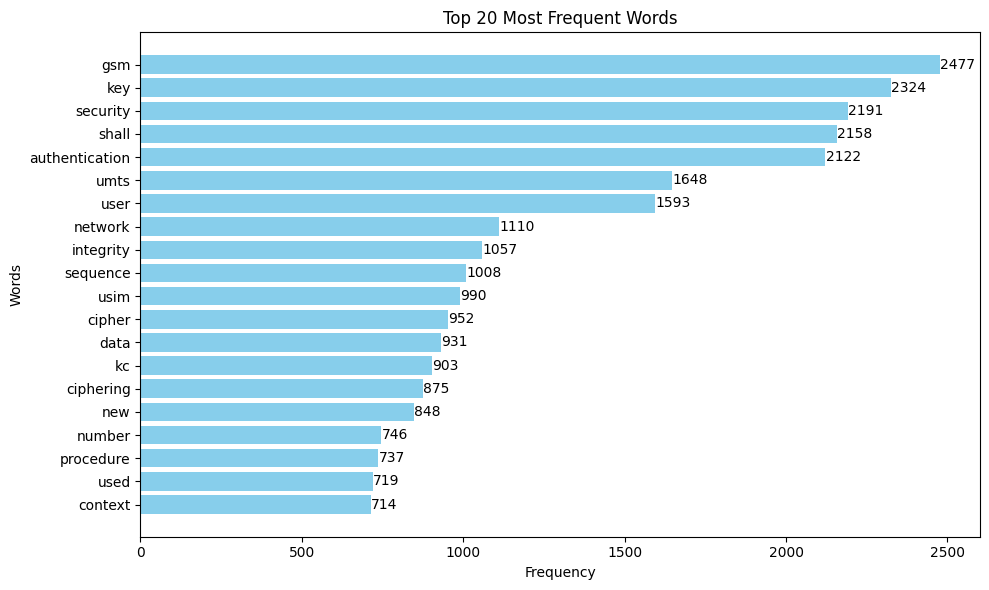

In [8]:
# Plotting word frequency
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Tokenize
words = cleaned_text.split()
words = [word.lower() for word in words]
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words and word.isalpha()]

# Frequency count
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plot with value labels
if common_words:
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 6))
    bars = plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Top 20 Most Frequent Words')
    plt.gca().invert_yaxis()

    # Add text labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1,             # X position (a little to the right)
                 bar.get_y() + bar.get_height()/2,  # Y center of bar
                 str(int(width)),       # Label = frequency count
                 va='center')           # Vertical alignment

    plt.tight_layout()
    plt.show()
else:
    print("No words found after filtering.")


In [9]:
!pip install wordcloud

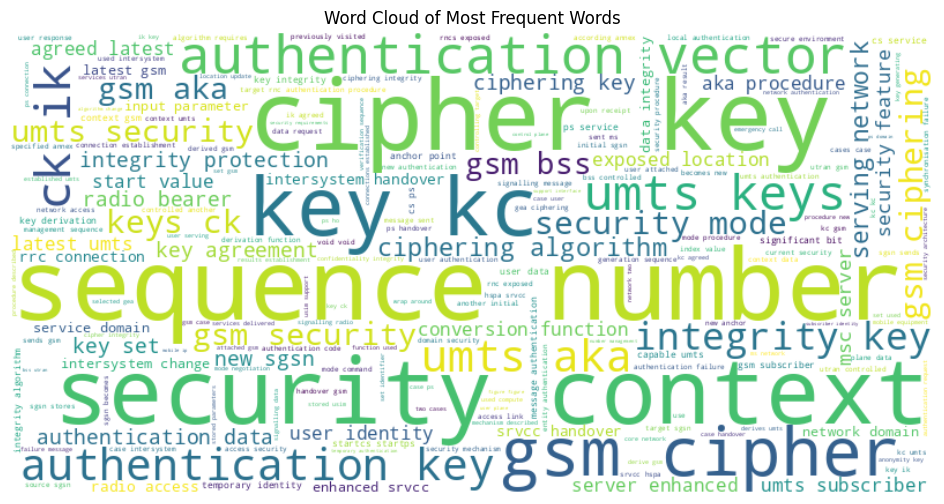

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the filtered words back into a single string
word_string = ' '.join(filtered_words)

# Create a WordCloud object
wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(word_string)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words")
plt.show()


In [11]:
from google.colab import files
uploaded = files.upload()

Saving 800px_COLOURBOX6440911.jpg to 800px_COLOURBOX6440911.jpg


In [12]:
!pip install wordcloud
!pip install pillow

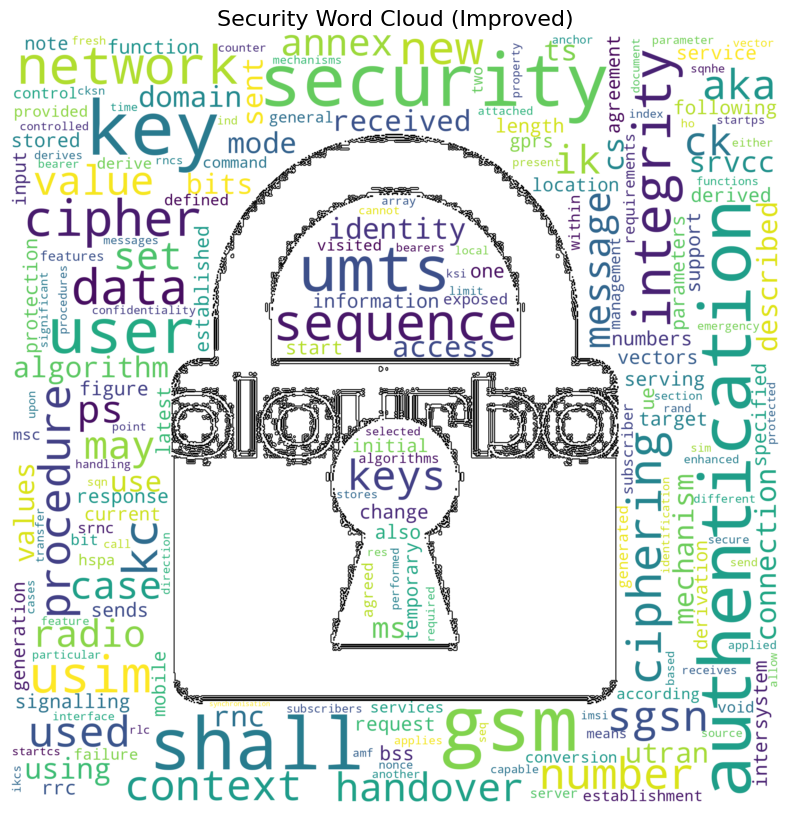

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the image
mask = np.array(Image.open("800px_COLOURBOX6440911.jpg"))

# Create a better WordCloud object
wordcloud = WordCloud(
    background_color="white",
    mask=mask,
    contour_color="black",
    contour_width=1.5,
    colormap="viridis",  # Try other colormaps too
    max_words=200,
    max_font_size=80,
    scale=3,
    prefer_horizontal=0.9
).generate_from_frequencies(word_counts)

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Security Word Cloud (Improved)", fontsize=16)
plt.show()


In [14]:
pip install scikit-learn pandas

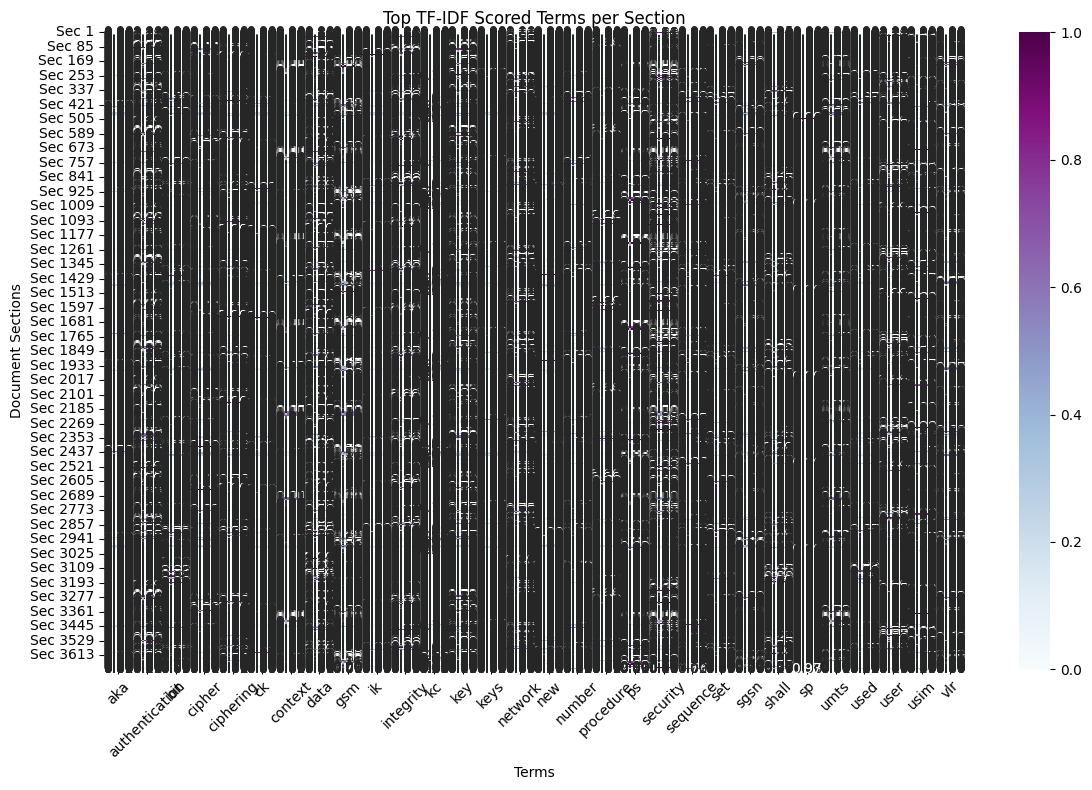

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

def split_by_section(text):
    pattern = r"(?=\n\d+(\.\d+)*\s)"
    sections = re.split(pattern, text)
    sections = [s for s in sections if s and s.strip()]
    return sections

# 👉 Make sure to define 'cleaned' earlier in your notebook, like:
# cleaned = open("your_file.txt", "r").read()

sections = split_by_section(cleaned_text)

clean_sections = [sec.lower() for sec in sections]

vectorizer = TfidfVectorizer(stop_words='english', max_features=30)
tfidf_matrix = vectorizer.fit_transform(clean_sections)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.index = [f"Sec {i+1}" for i in range(len(sections))]

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df, cmap="BuPu", annot=True, fmt=".2f")
plt.title("Top TF-IDF Scored Terms per Section")
plt.xlabel("Terms")
plt.ylabel("Document Sections")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-18-fc69c0136cfe>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=term_scores[:15].values, y=term_scores[:15].index, palette="Blues_d")


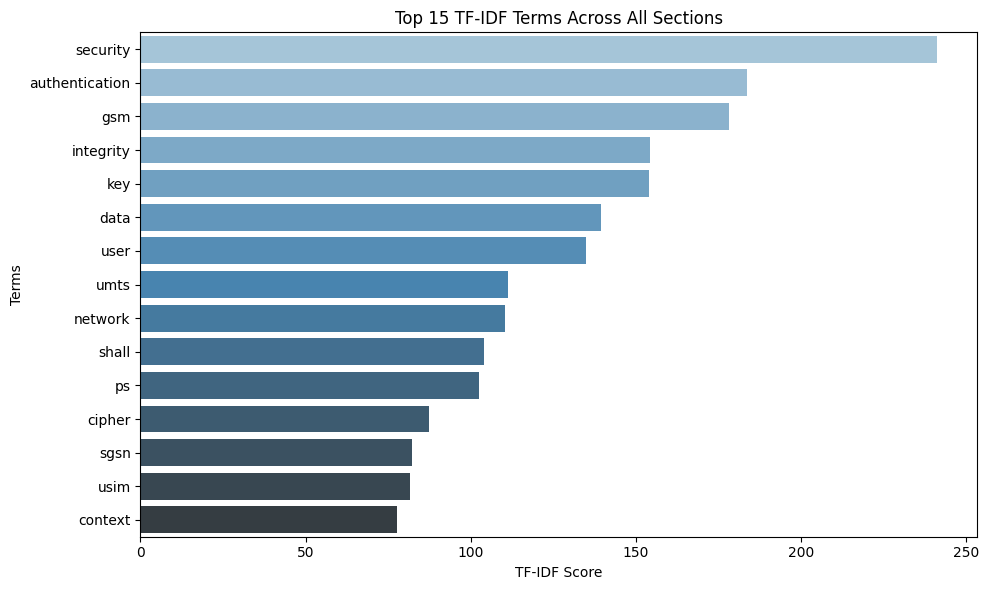

In [18]:
import numpy as np

# Sum TF-IDF scores across all sections
term_scores = tfidf_df.sum(axis=0).sort_values(ascending=False)

# Plot top 15 terms
plt.figure(figsize=(10, 6))
sns.barplot(x=term_scores[:15].values, y=term_scores[:15].index, palette="Blues_d")
plt.title("Top 15 TF-IDF Terms Across All Sections")
plt.xlabel("TF-IDF Score")
plt.ylabel("Terms")
plt.tight_layout()
plt.show()

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


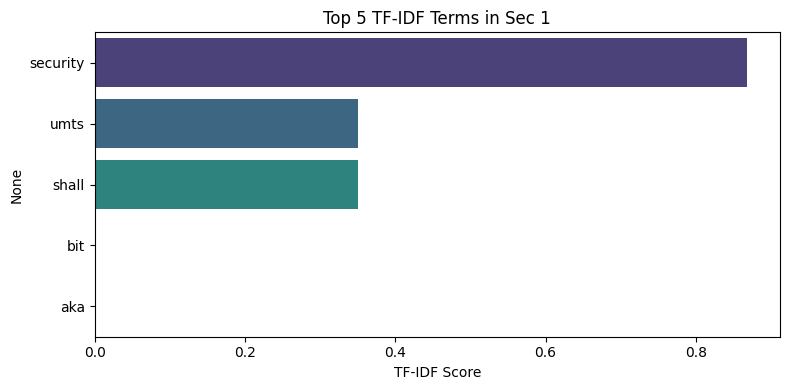

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


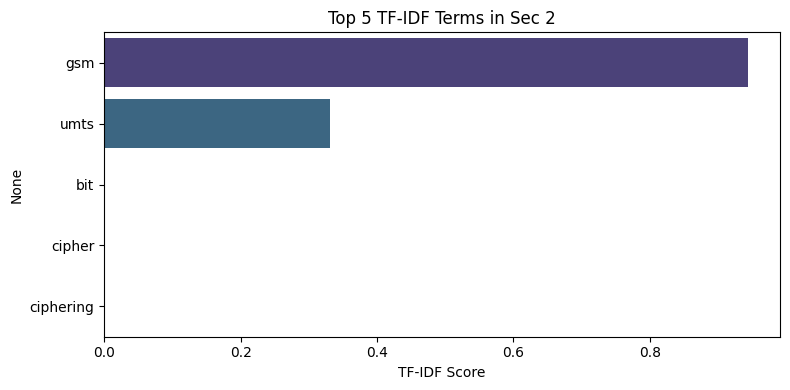

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


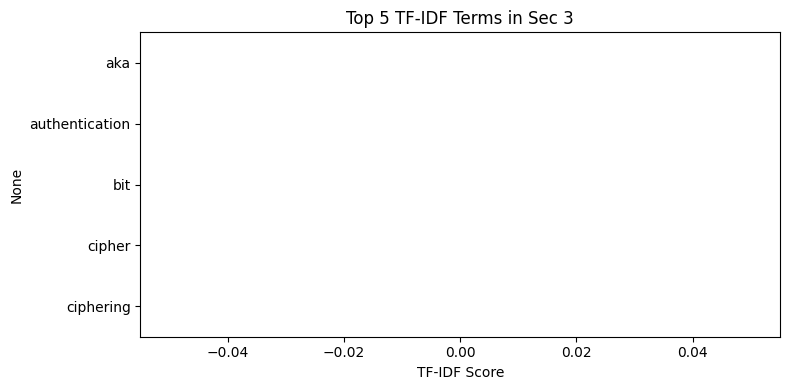

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


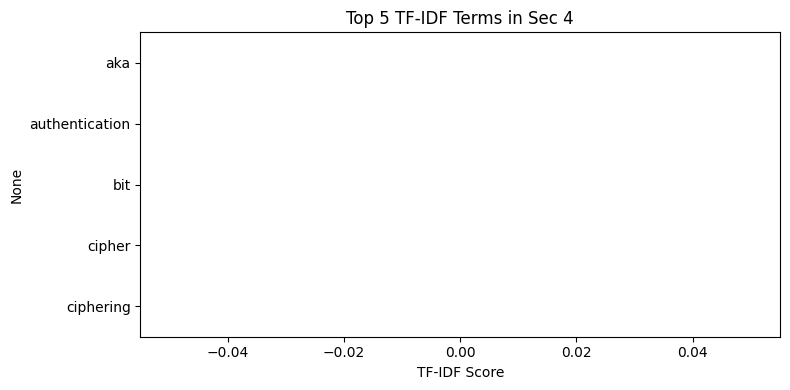

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


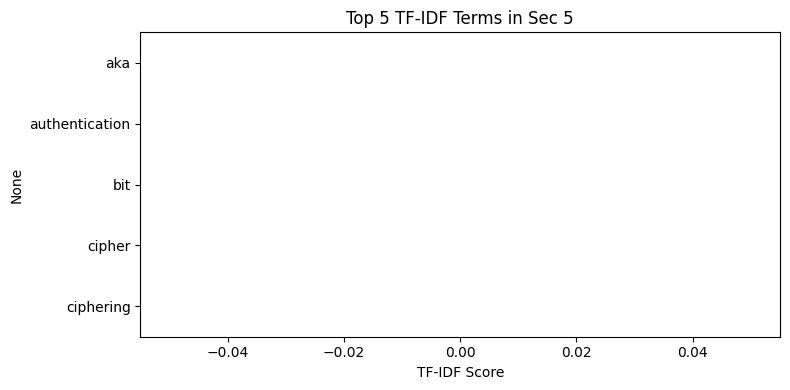

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


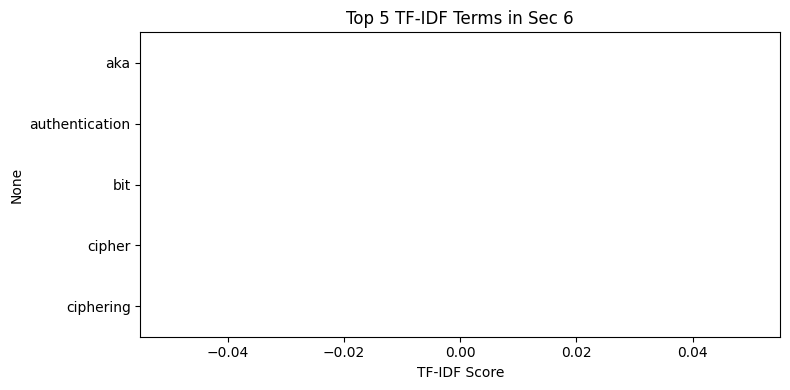

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


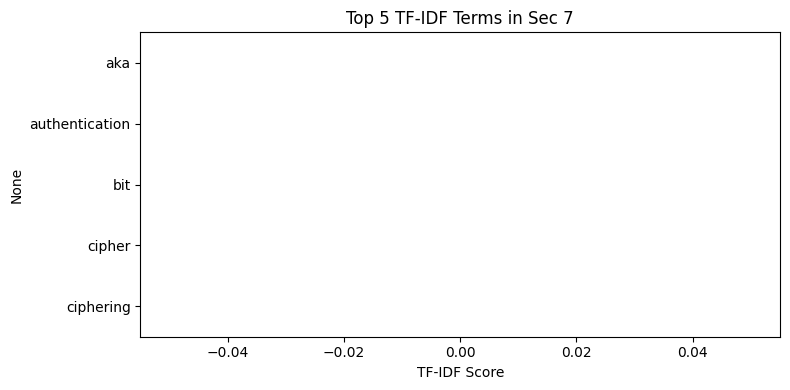

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


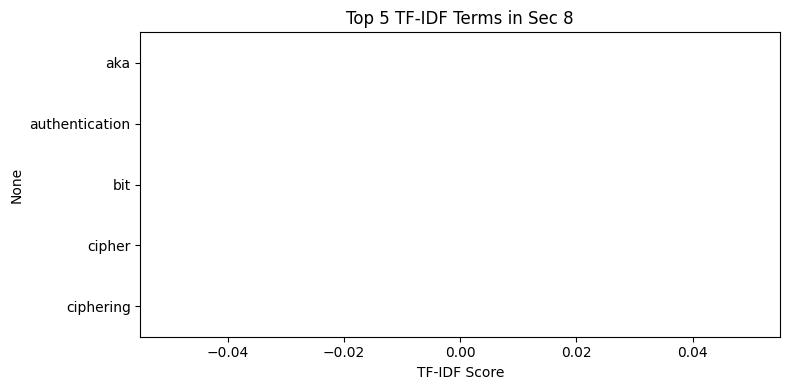

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


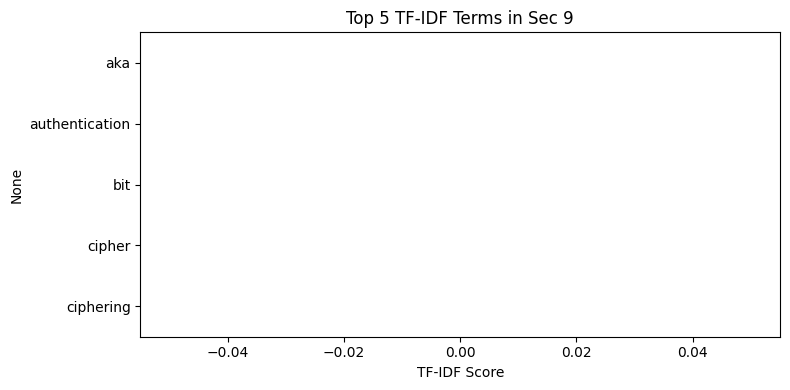

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


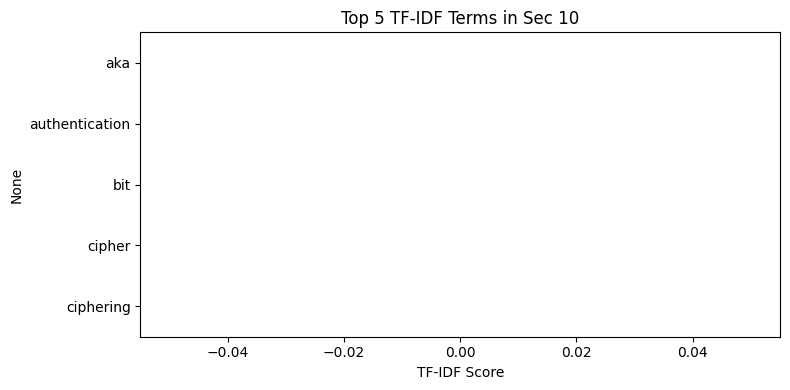

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


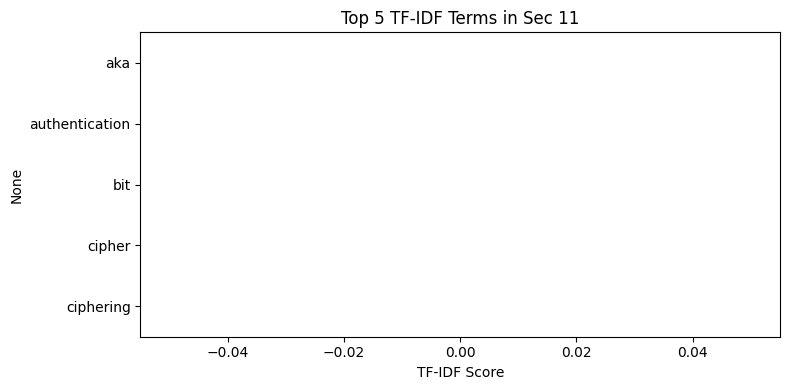

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


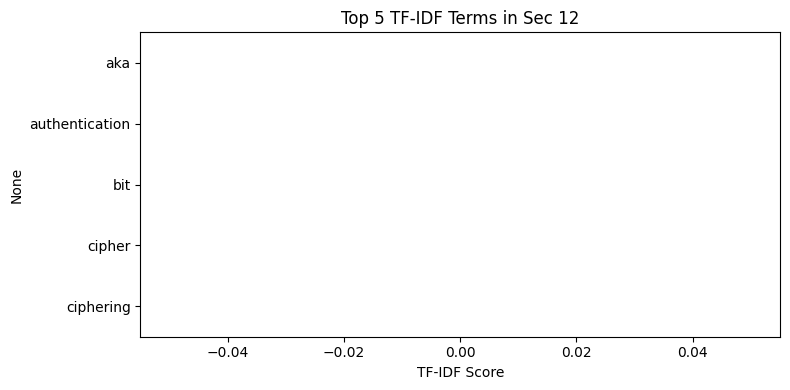

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


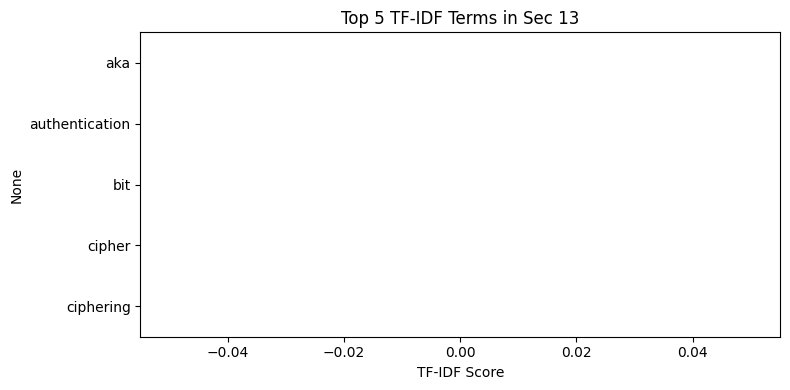

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


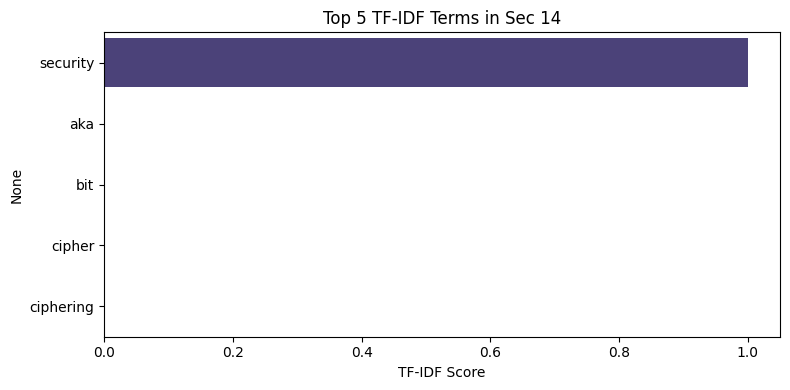

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


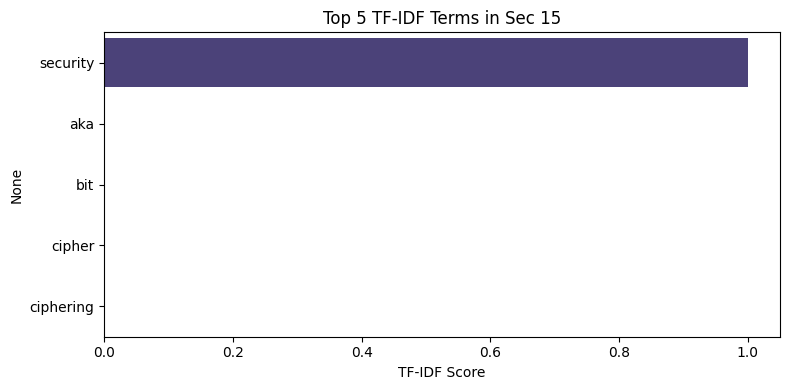

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


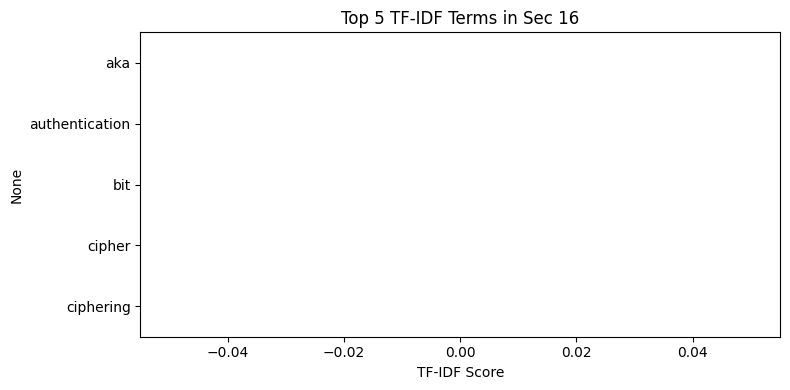

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


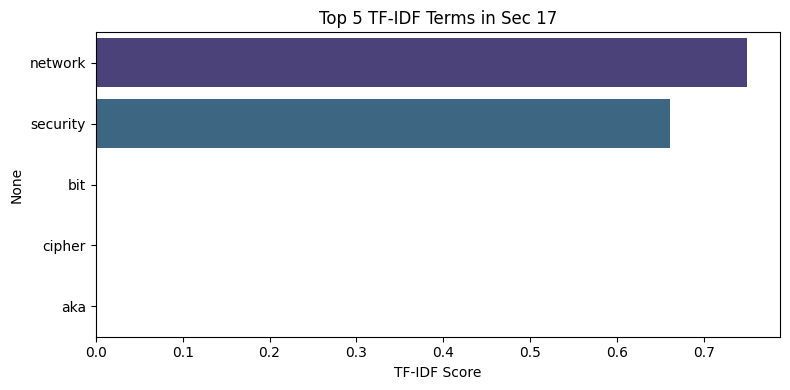

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


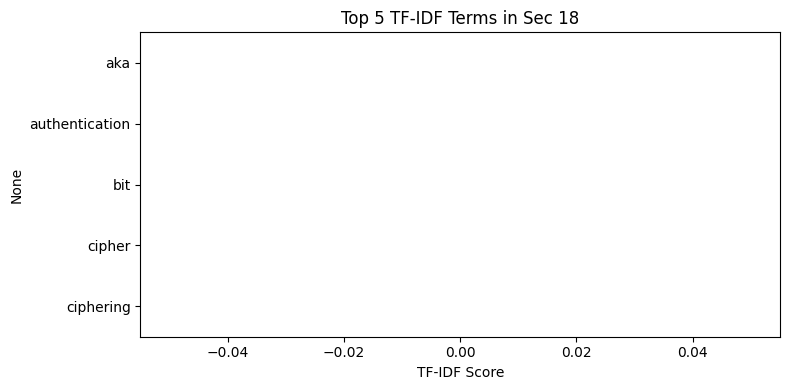

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


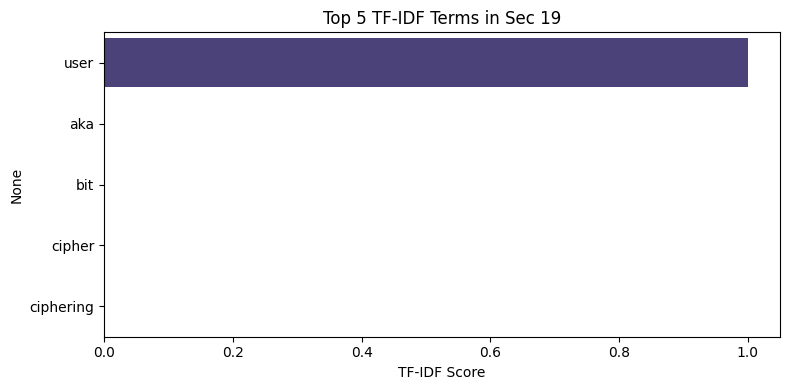

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


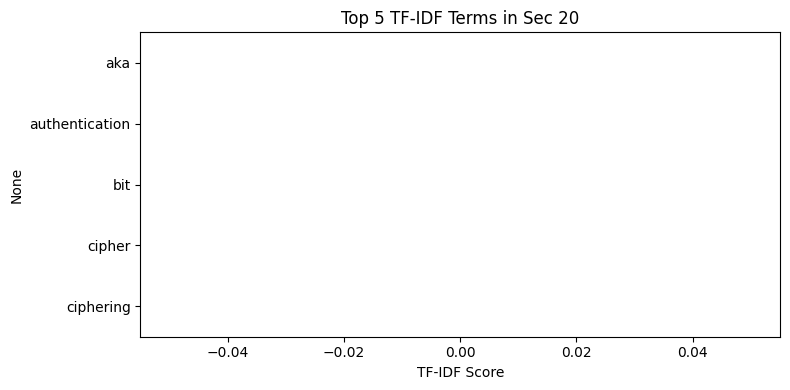

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


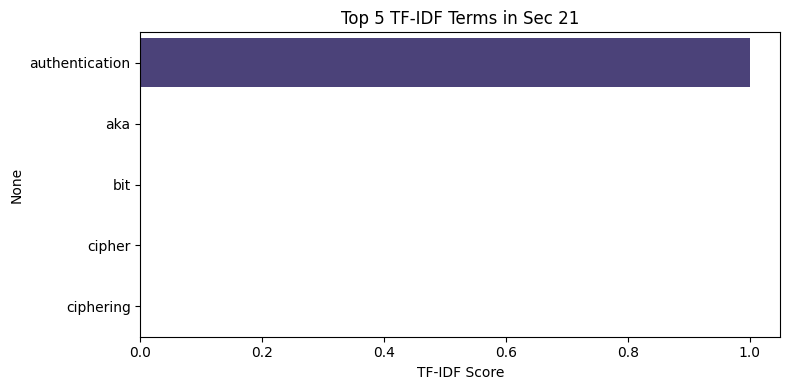

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


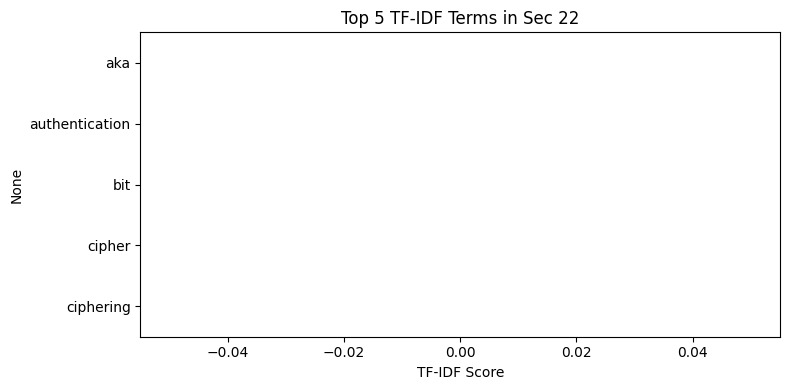

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


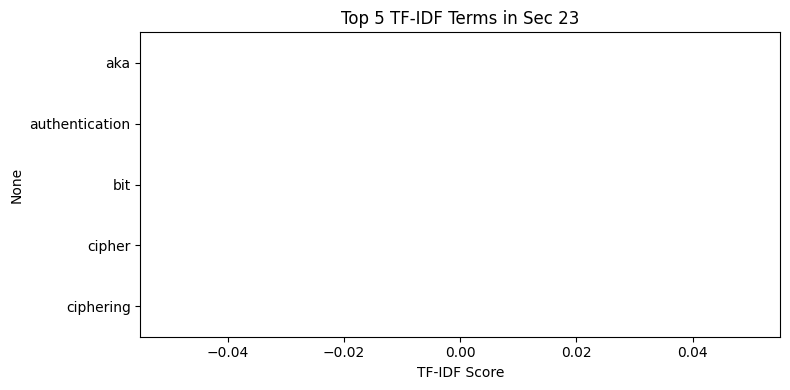

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


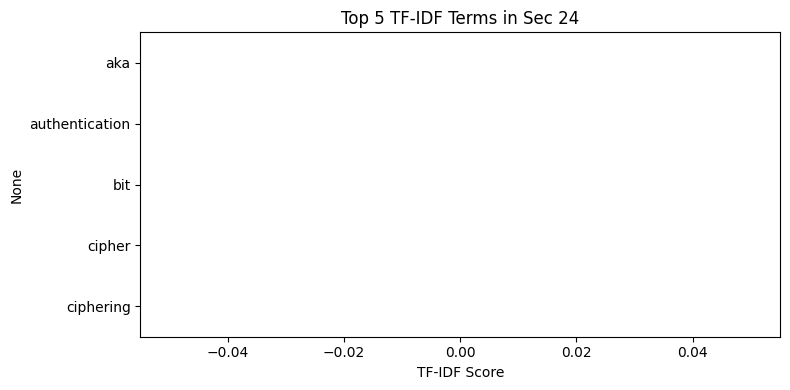

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


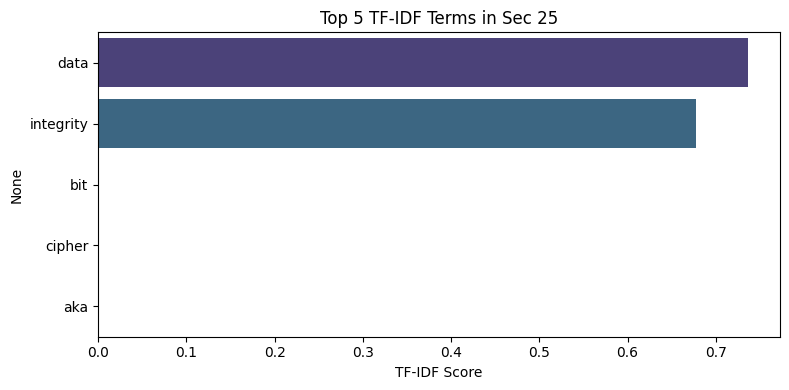

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


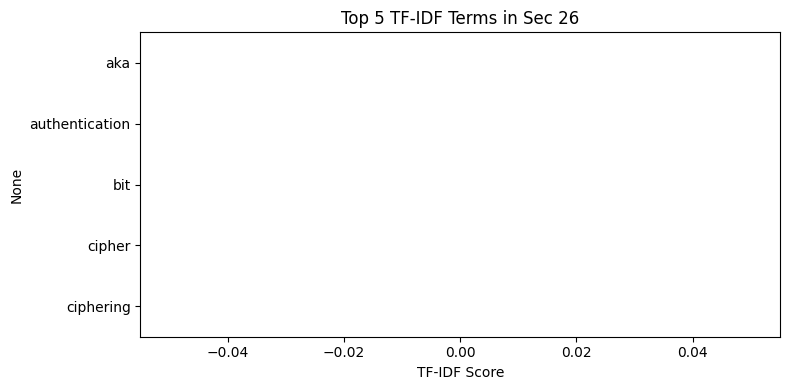

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


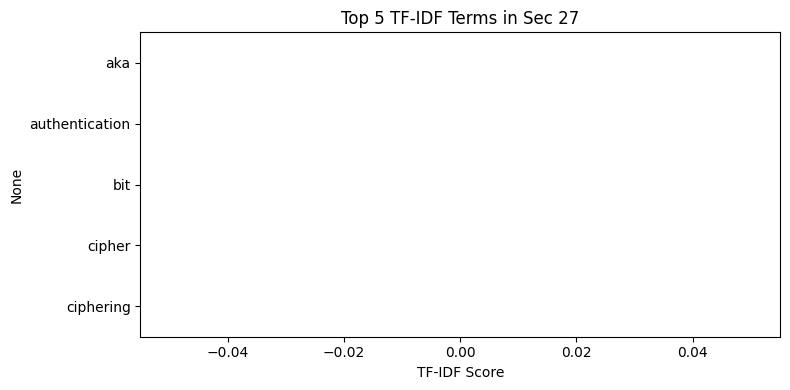

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


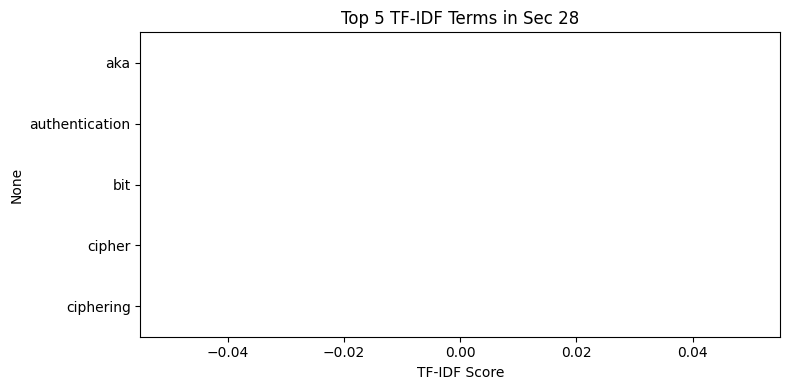

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


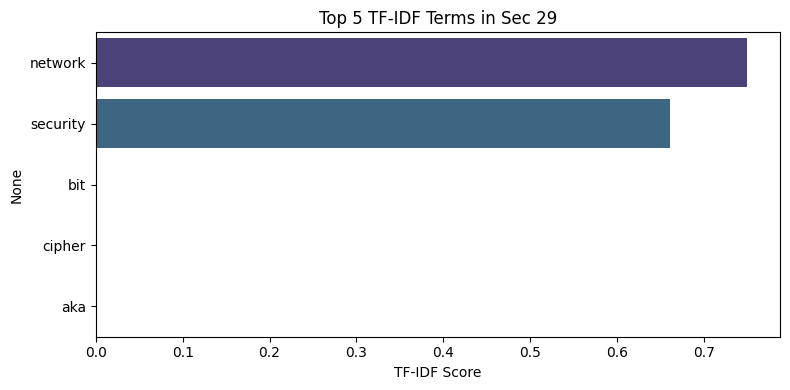

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


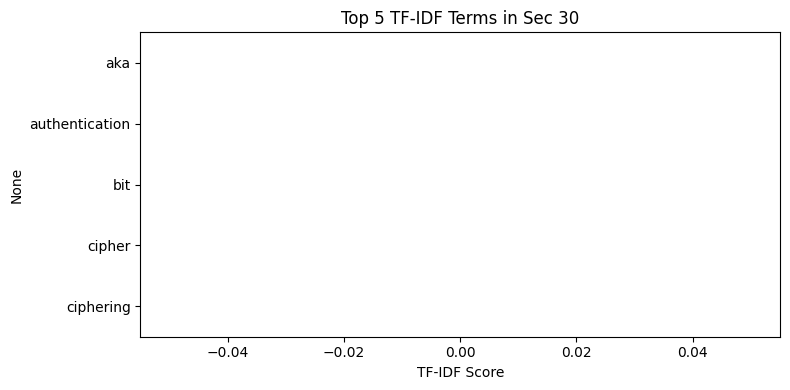

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


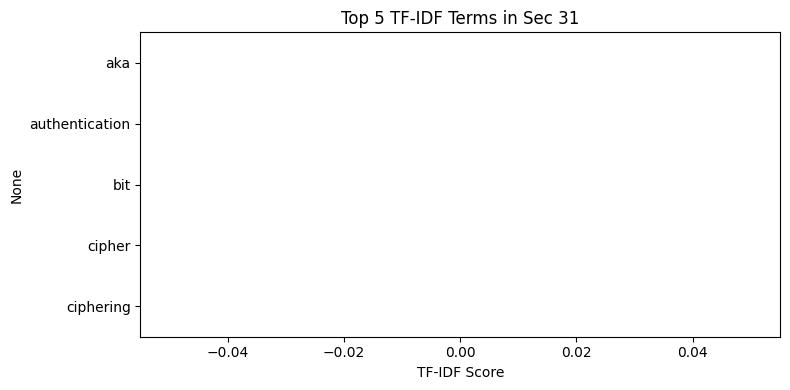

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


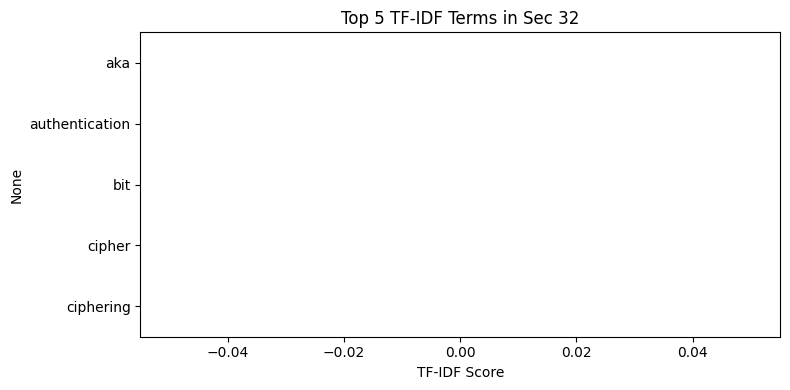

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


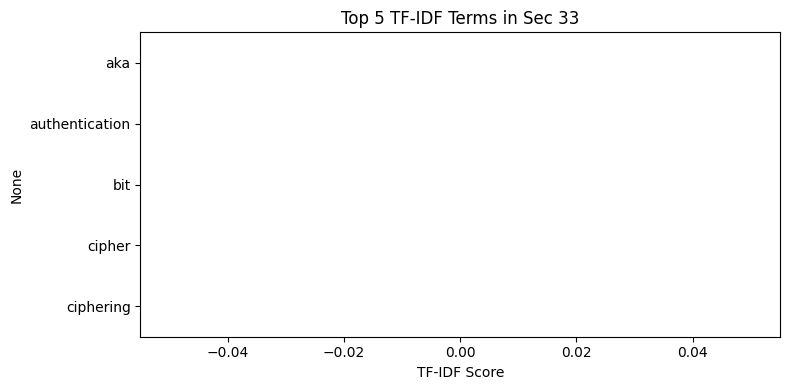

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


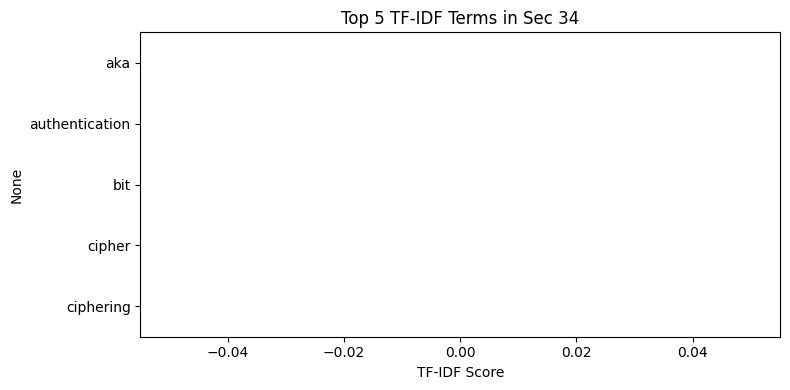

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


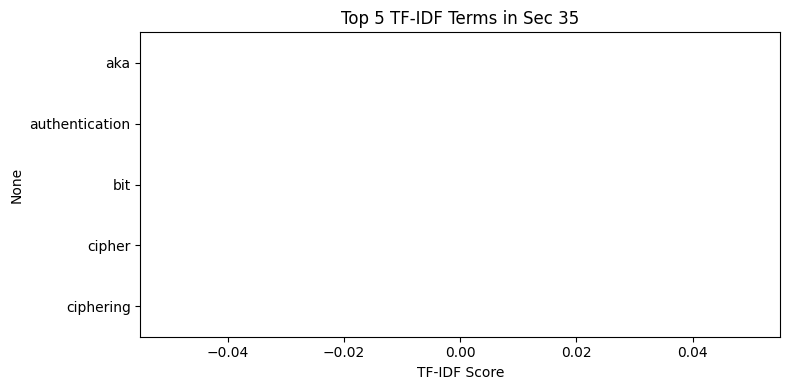

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


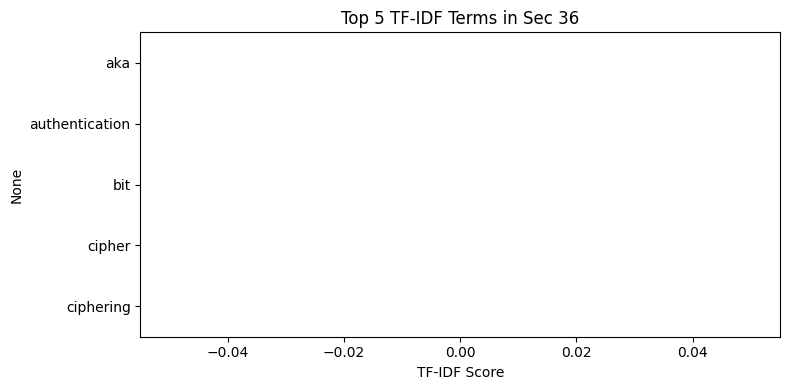

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


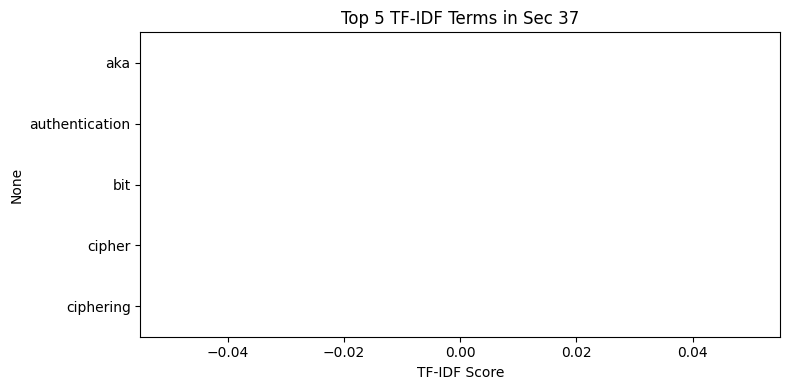

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


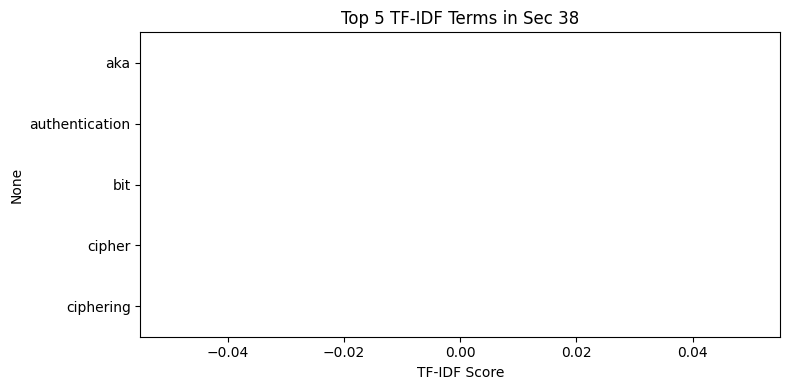

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


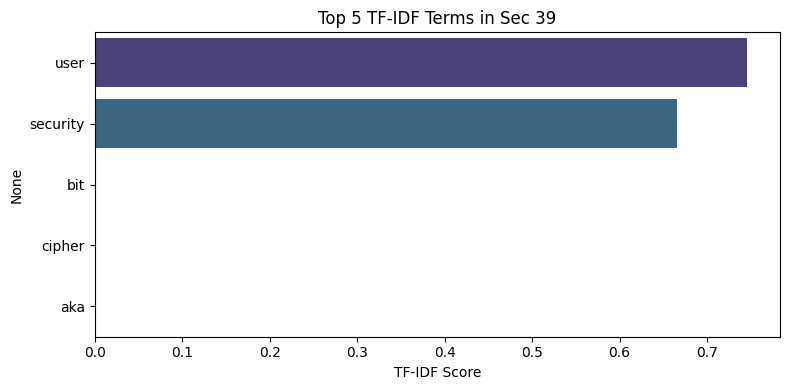

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


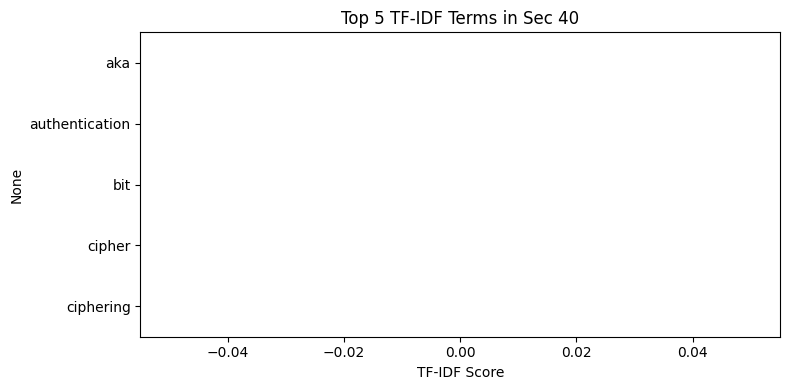

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


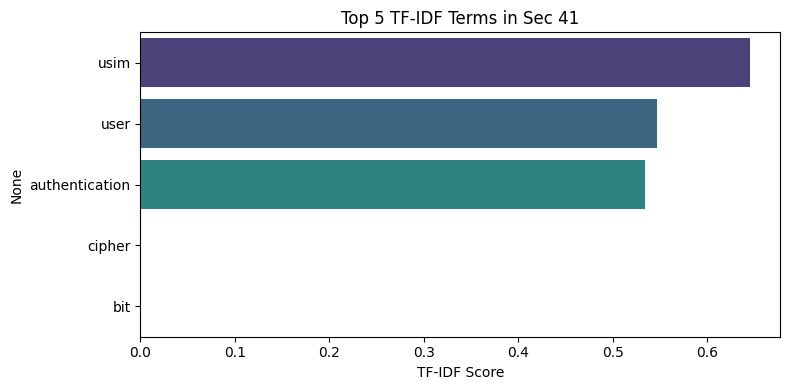

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


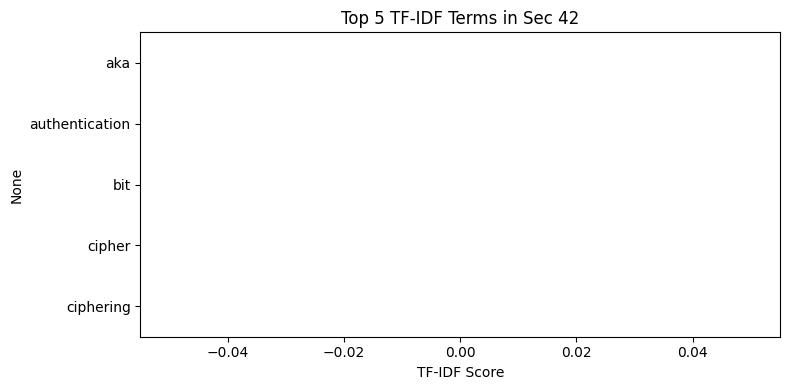

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


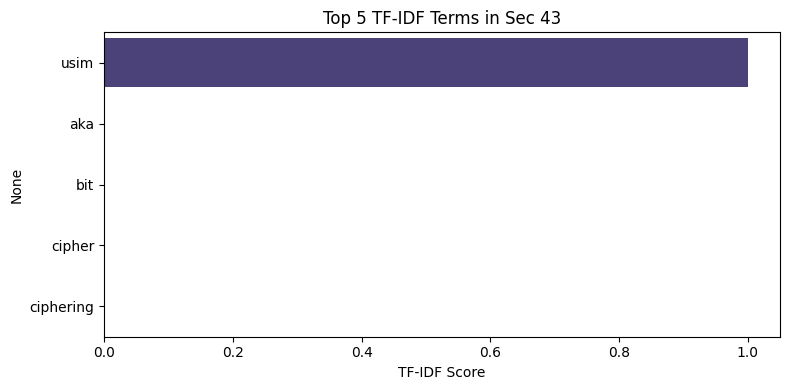

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


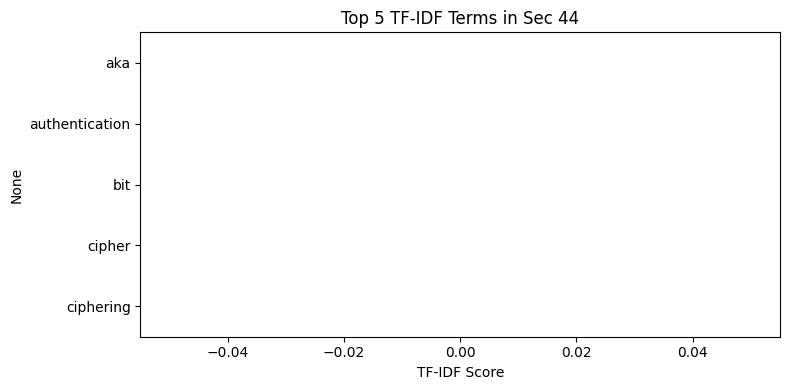

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


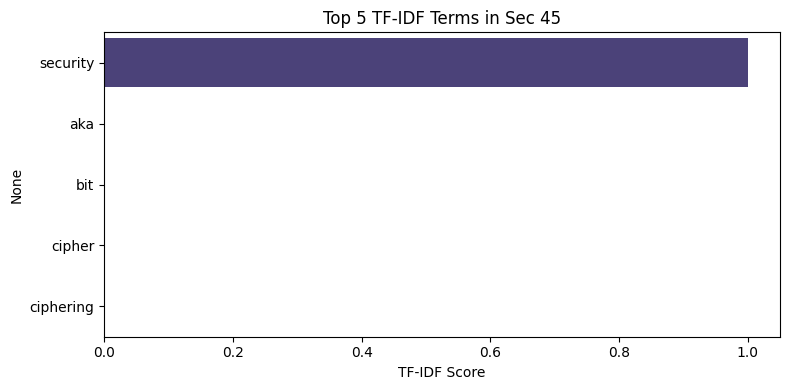

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


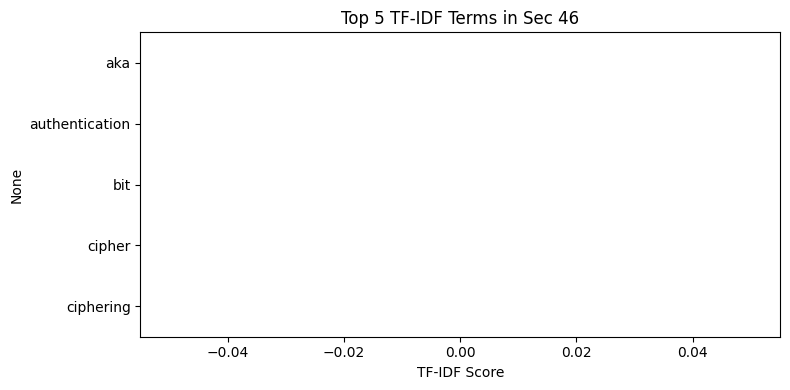

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


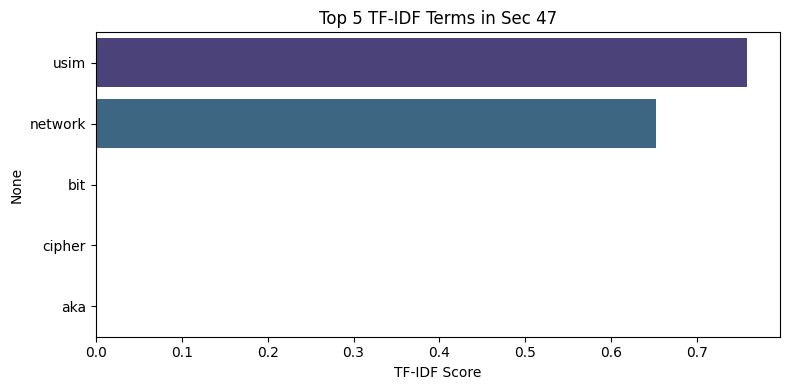

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


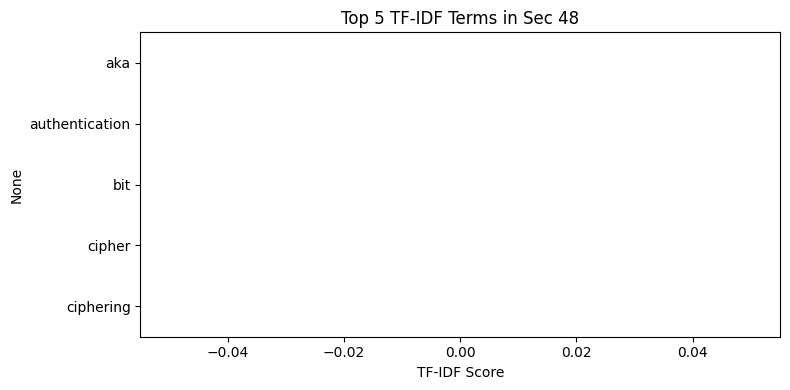

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


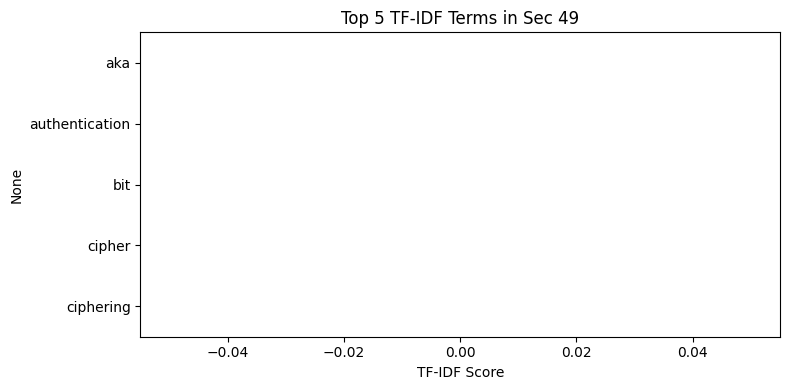

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


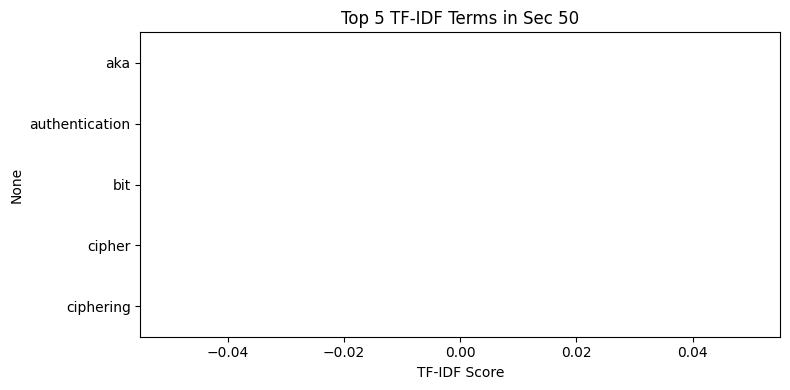

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


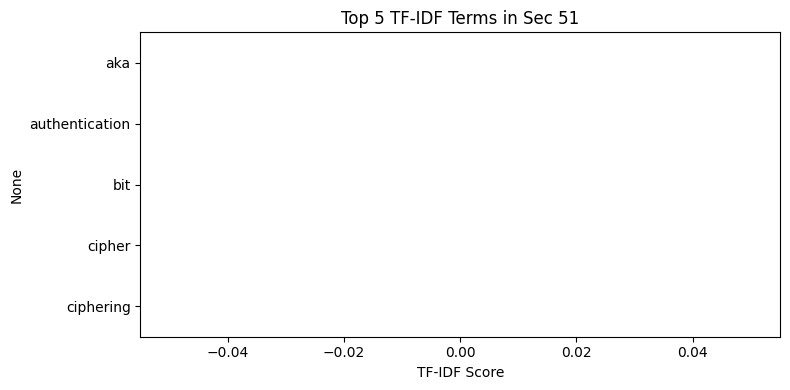

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


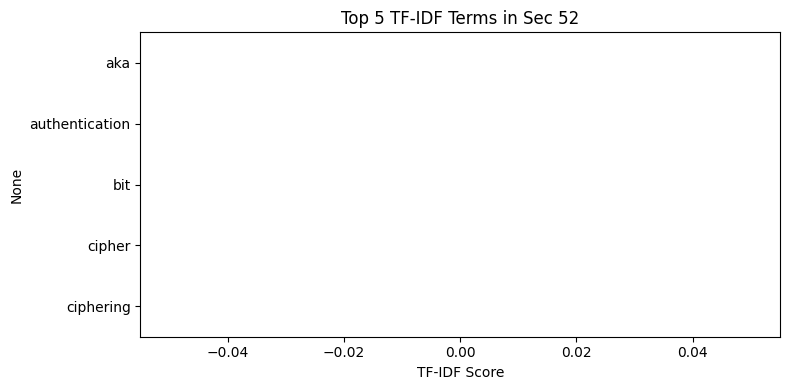

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


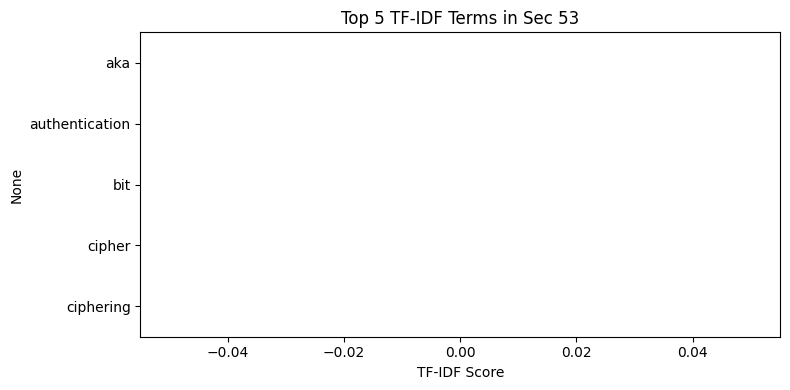

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


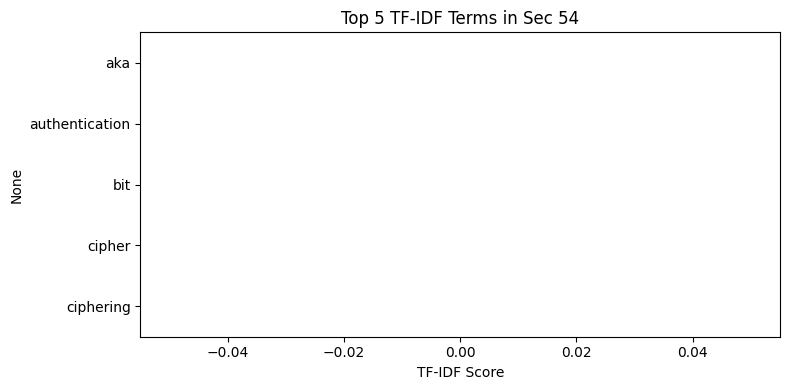

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


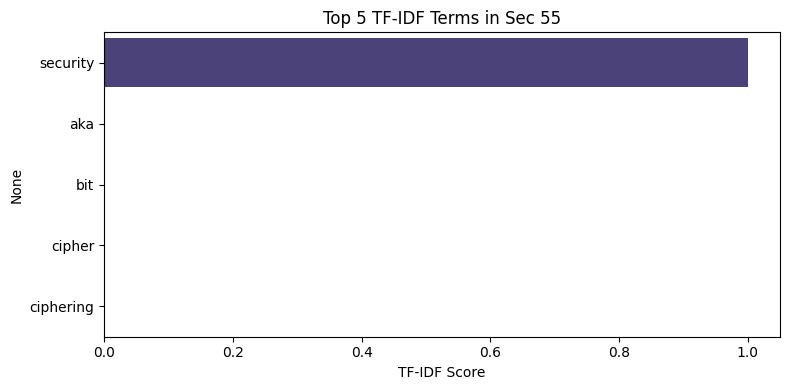

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


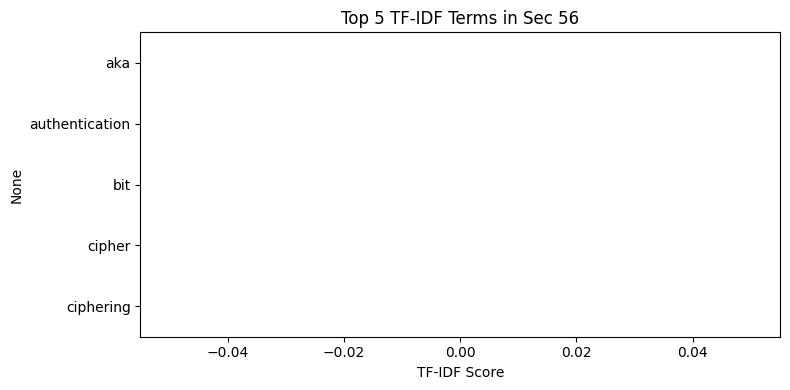

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


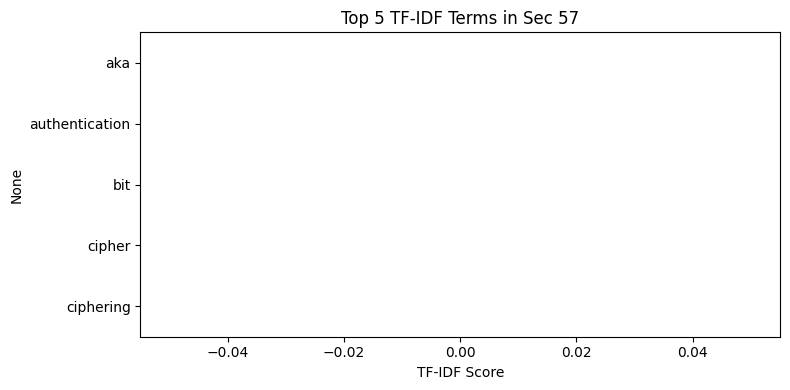

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


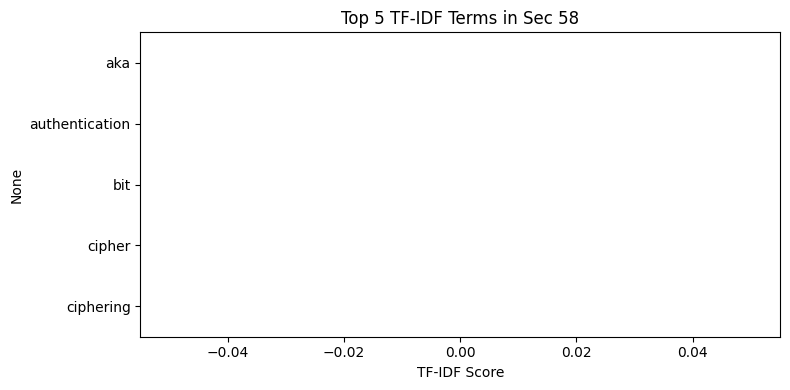

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


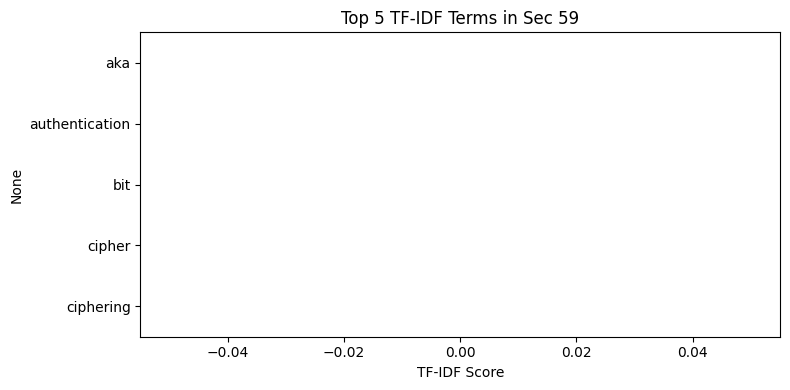

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


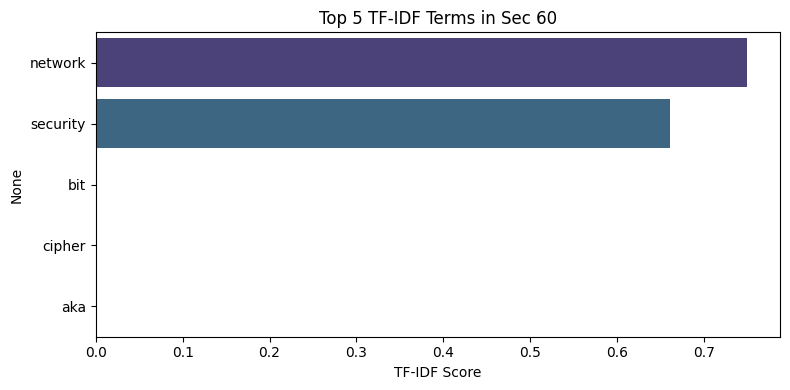

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


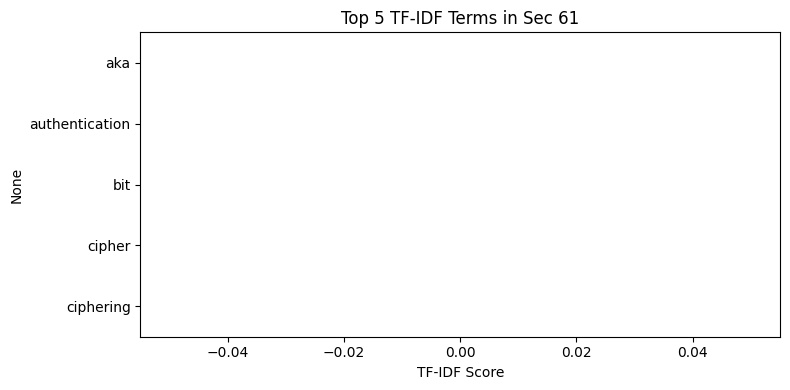

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


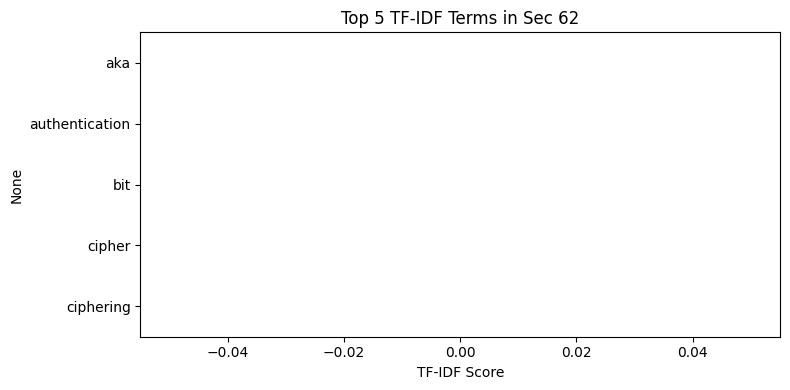

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


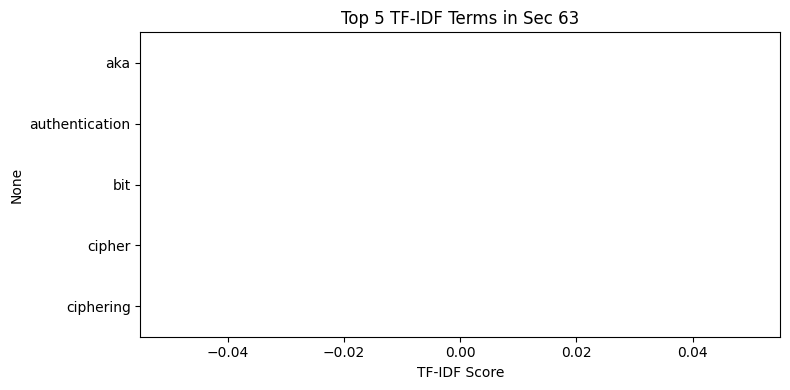

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


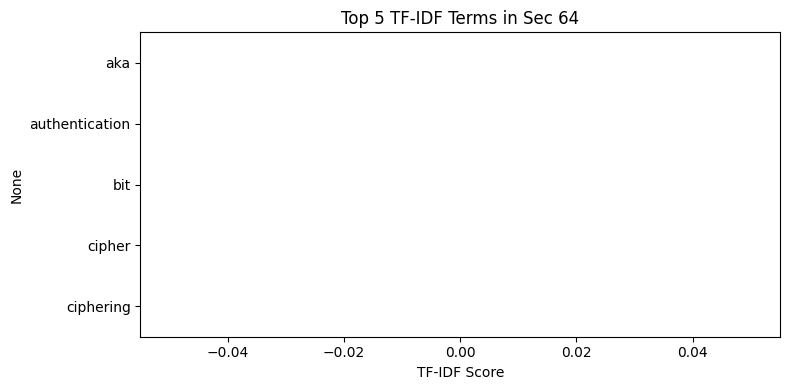

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


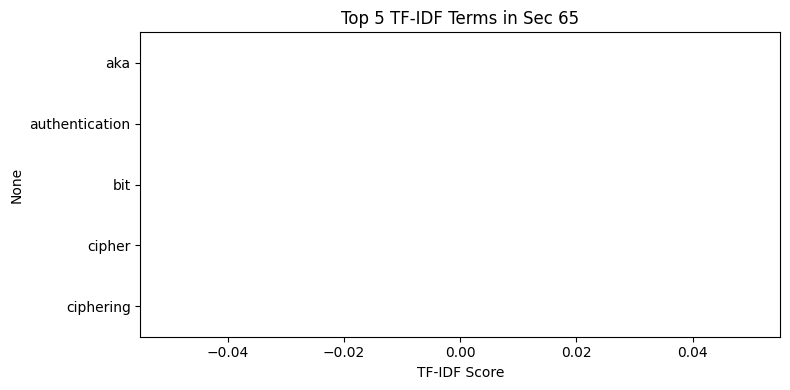

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


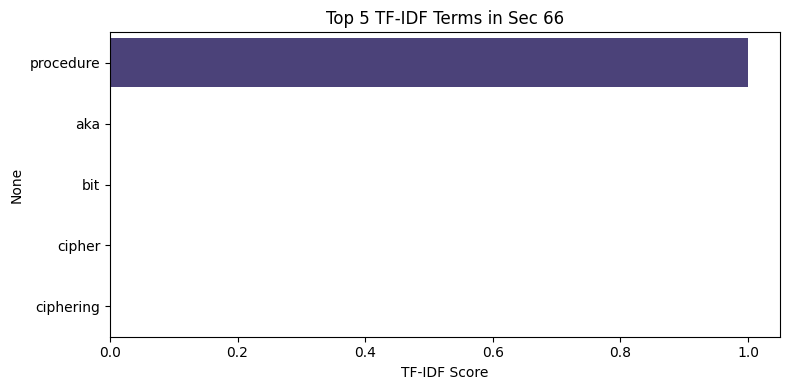

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


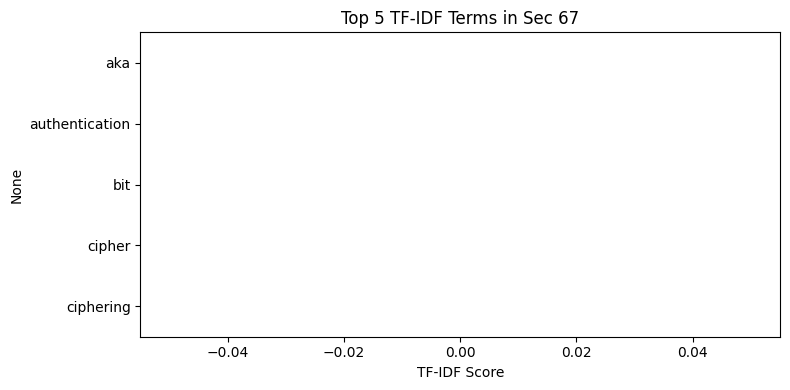

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


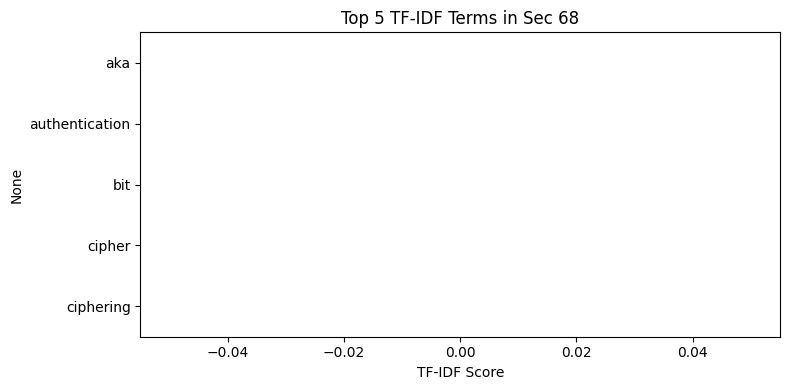

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


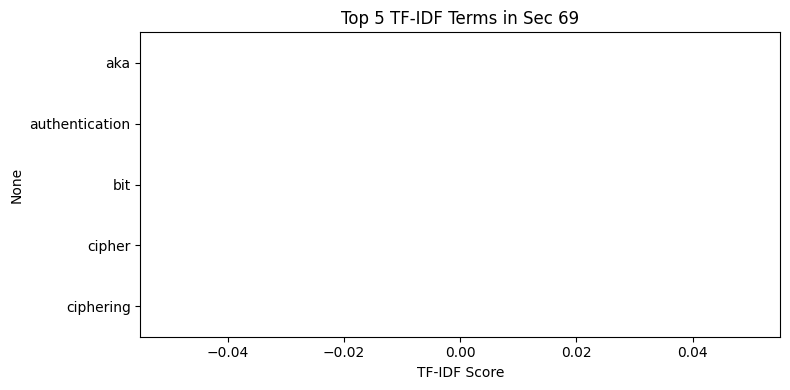

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


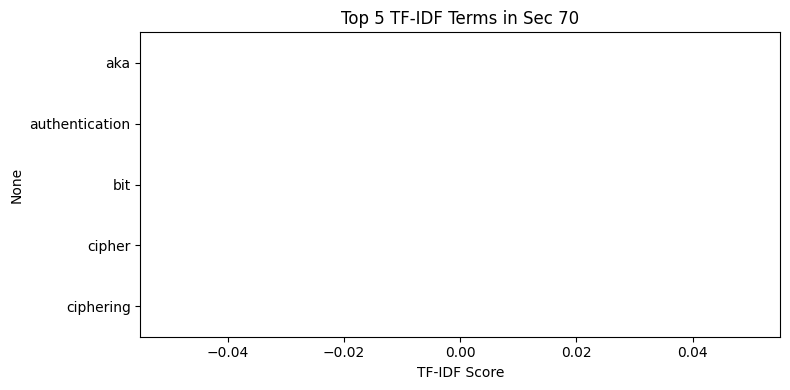

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


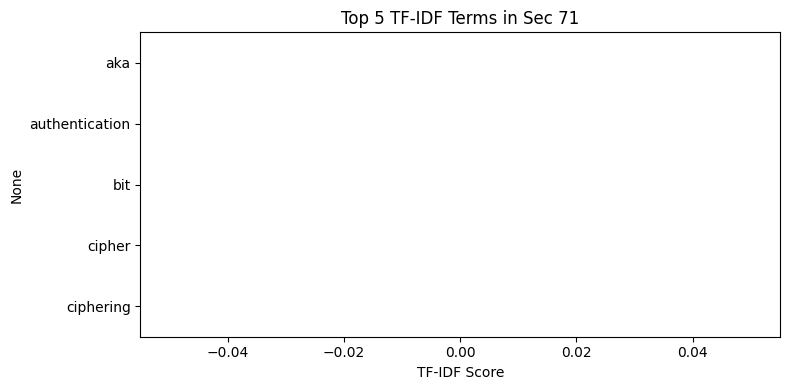

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


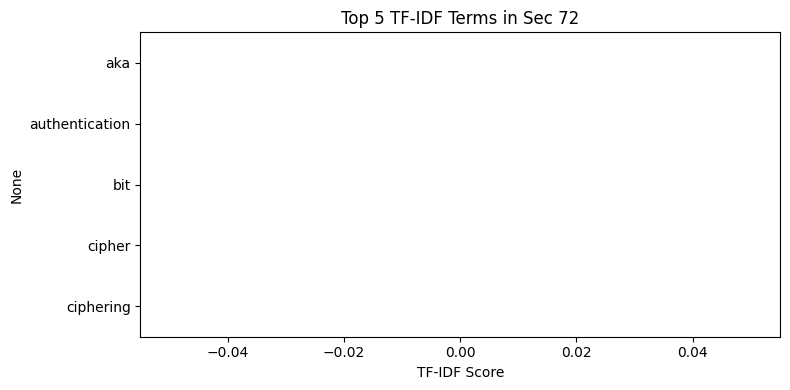

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


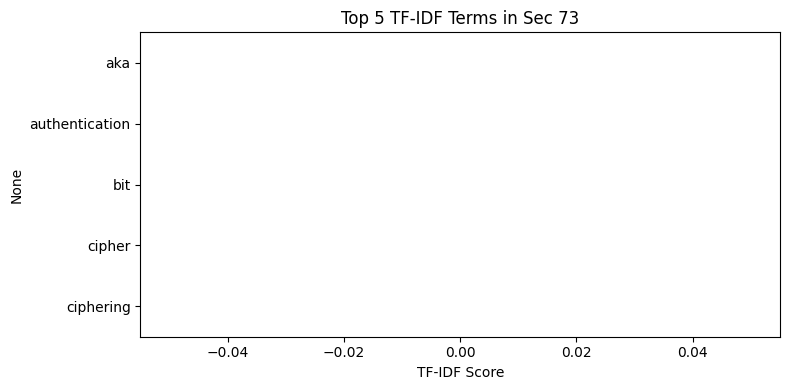

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


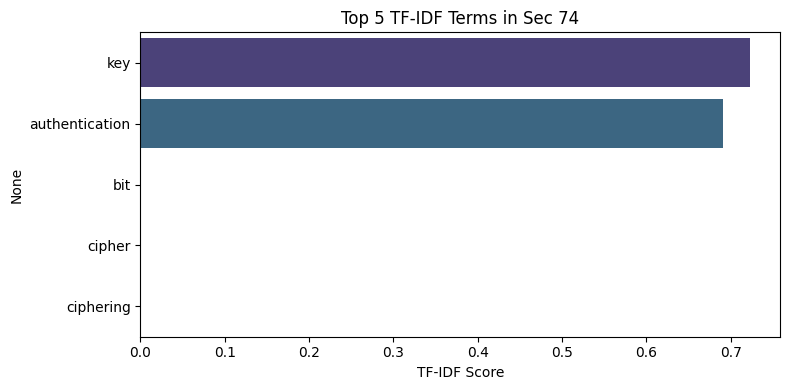

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


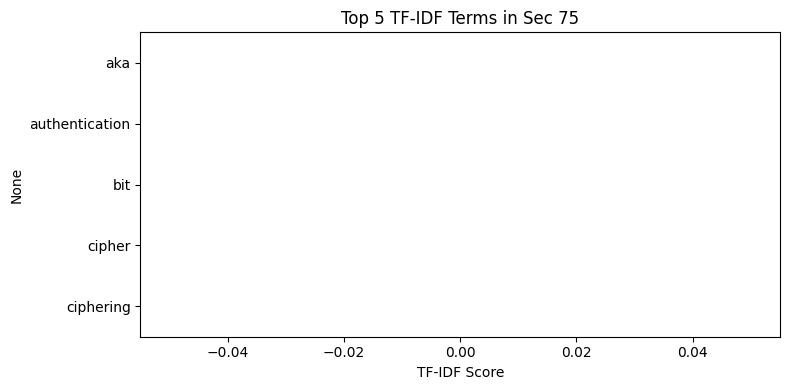

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


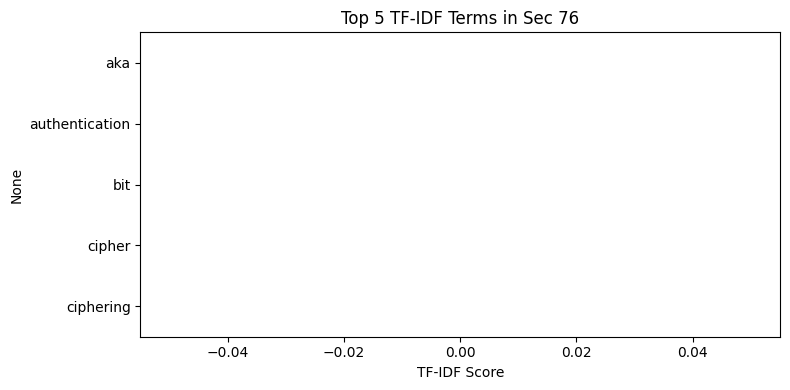

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


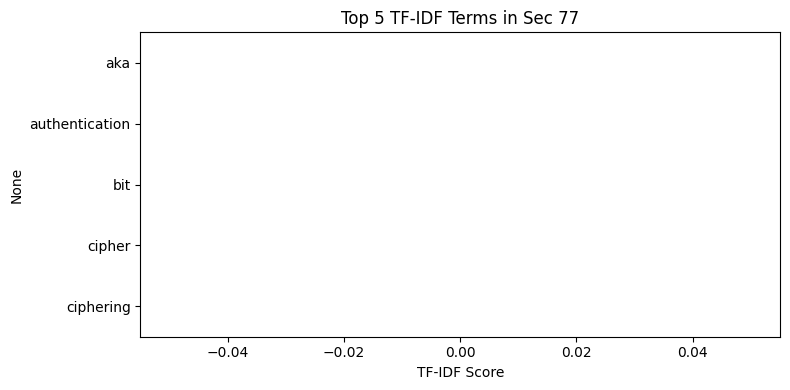

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


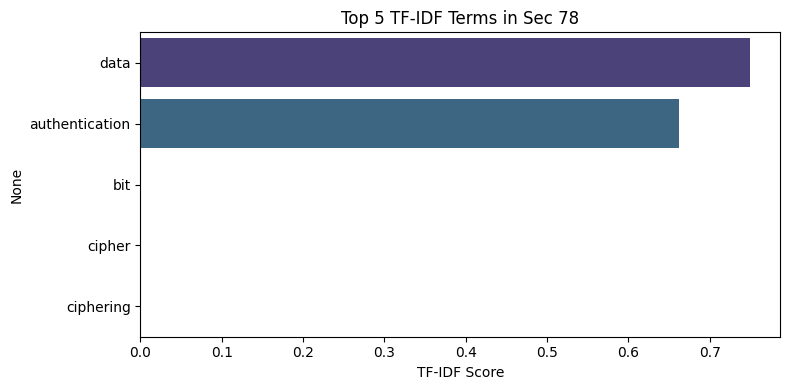

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


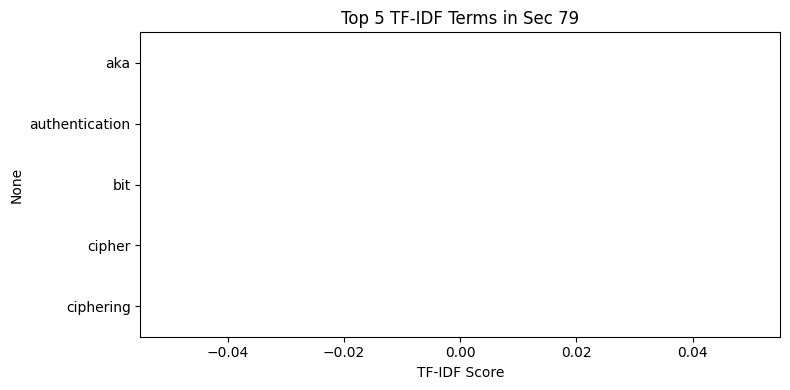

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


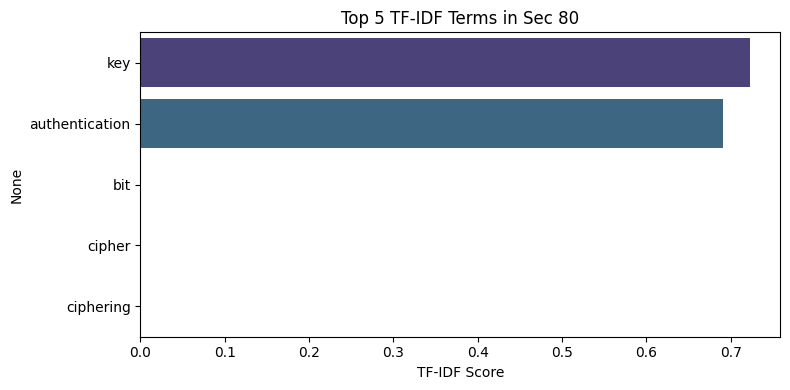

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


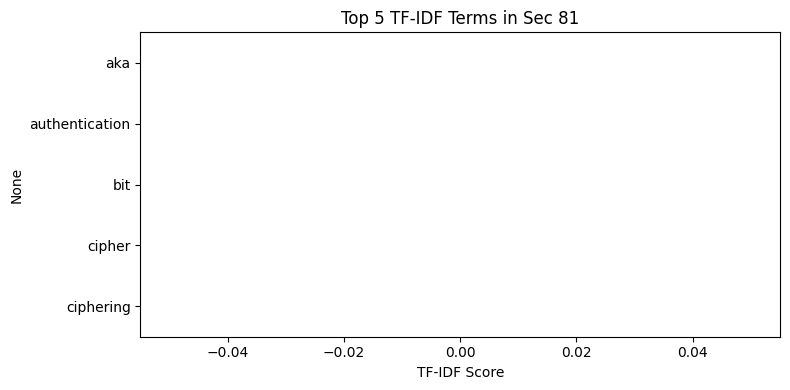

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


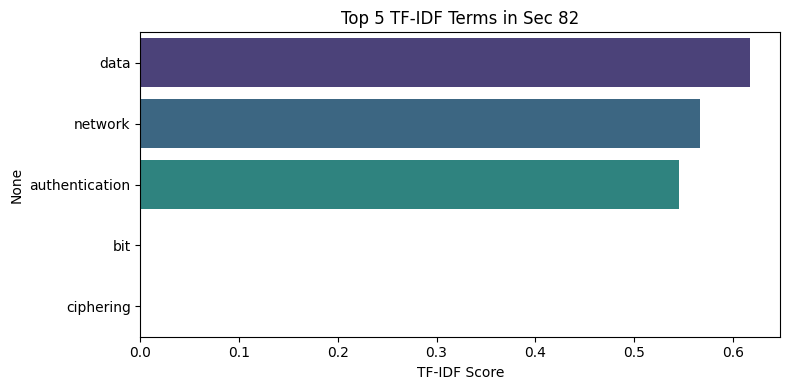

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


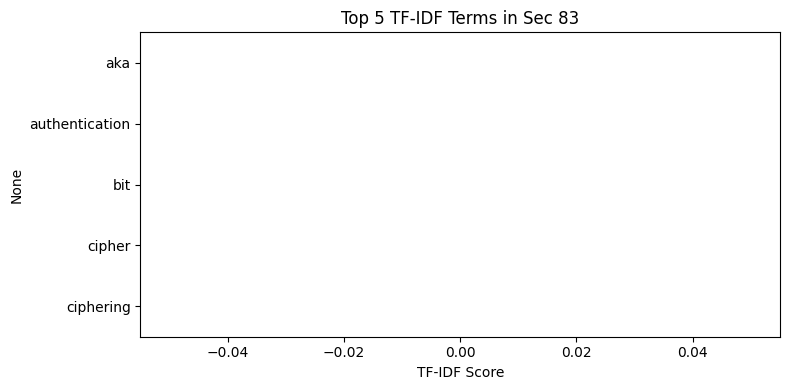

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


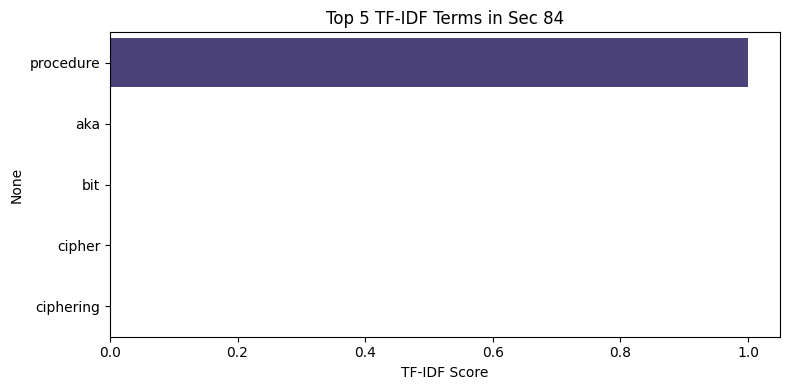

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


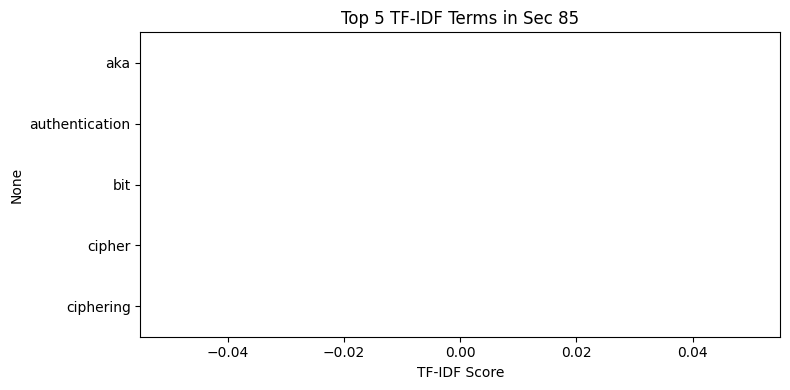

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


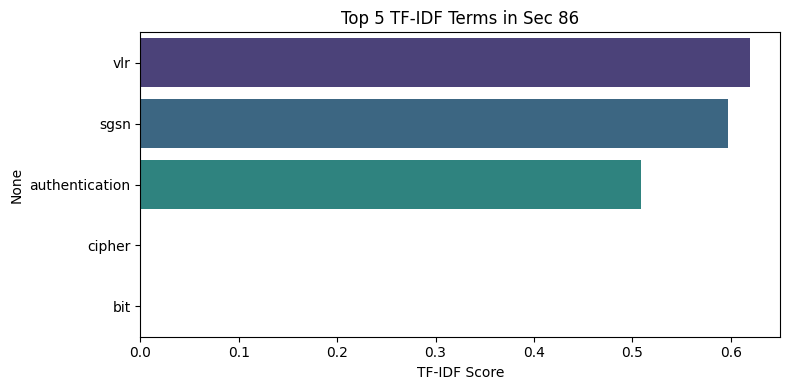

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


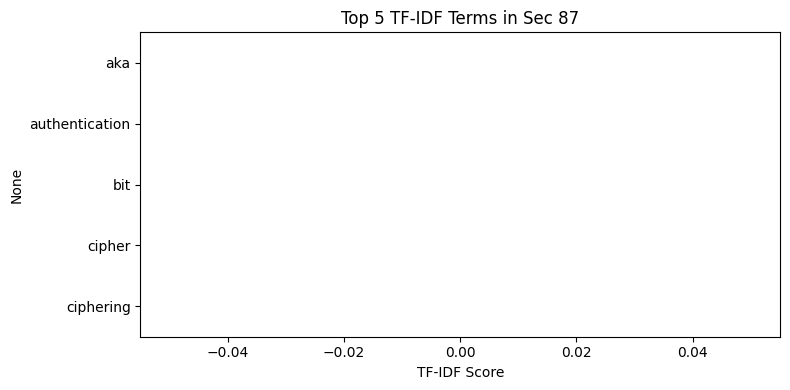

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


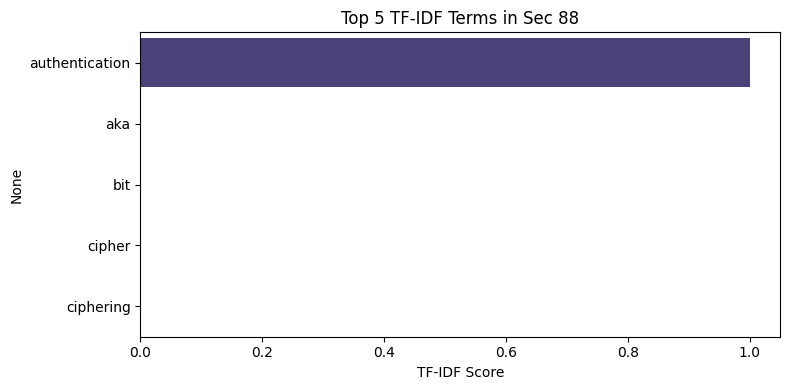

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


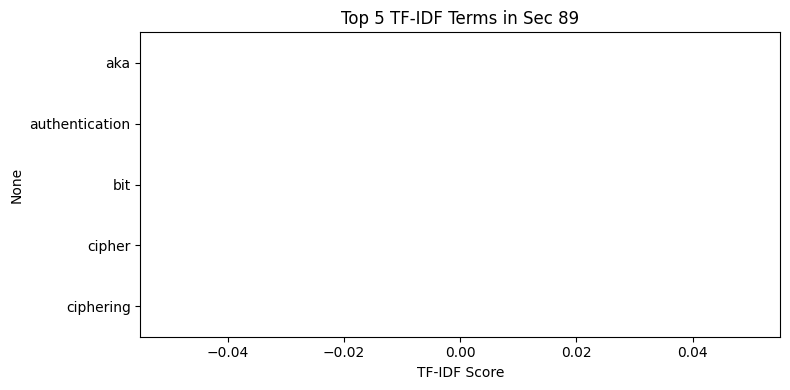

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


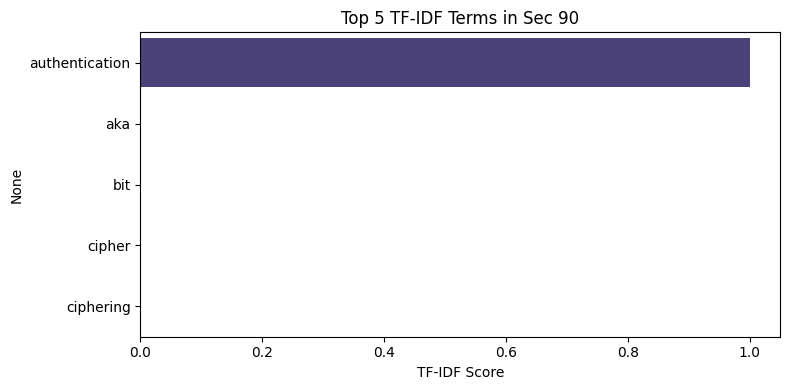

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


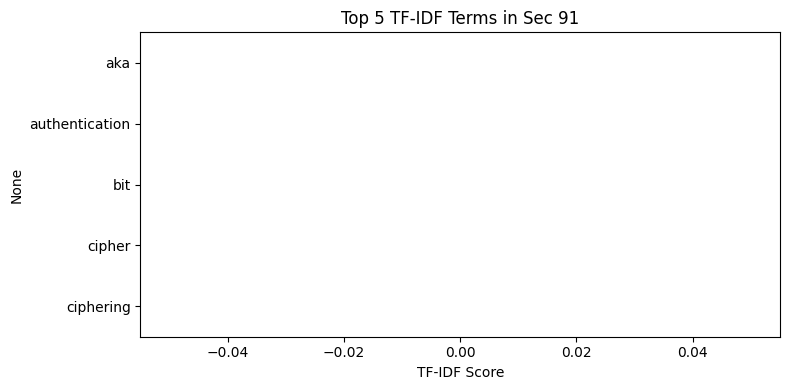

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


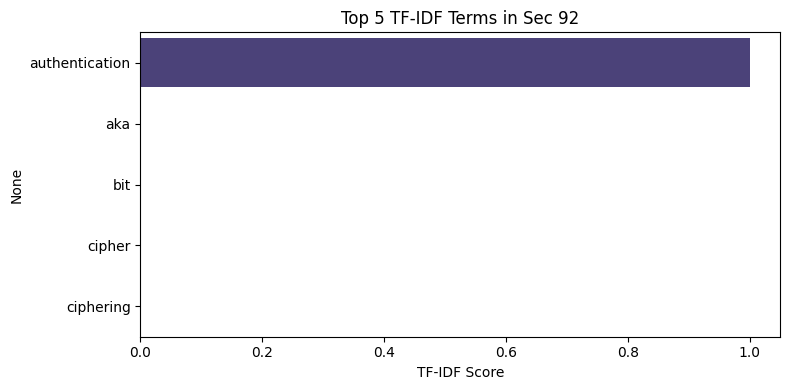

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


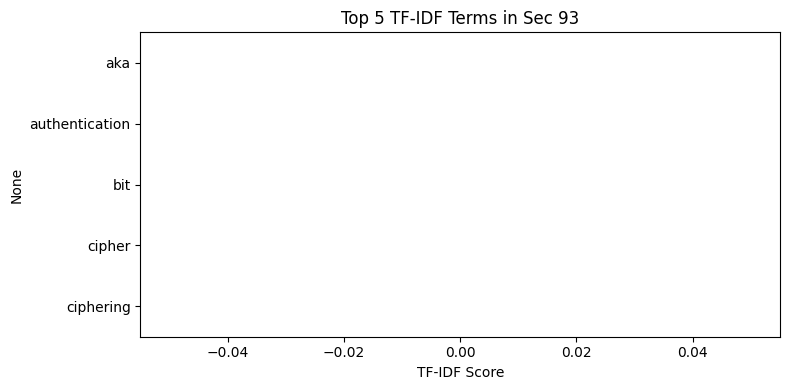

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


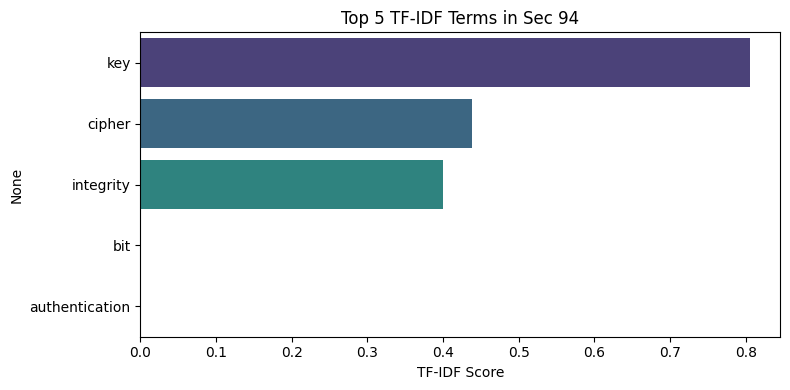

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


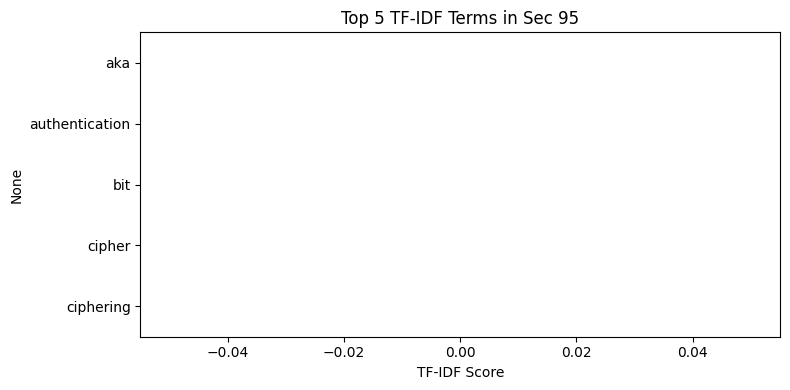

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


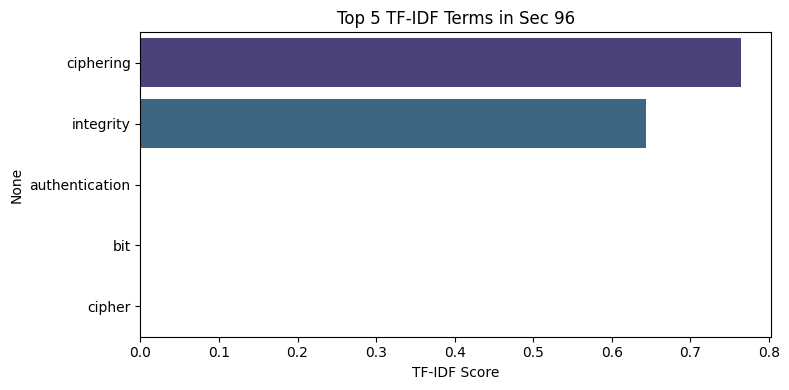

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


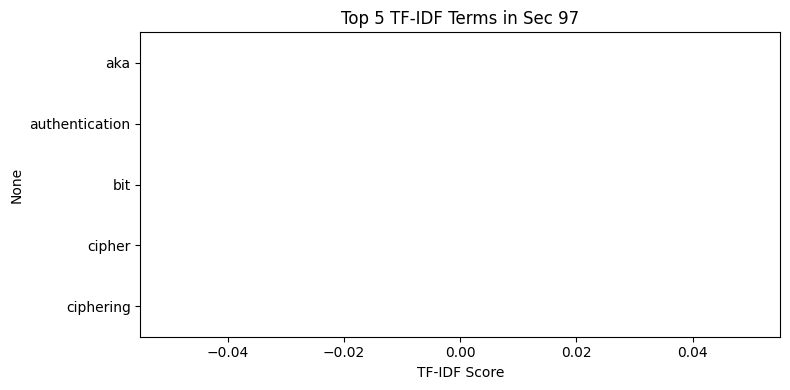

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


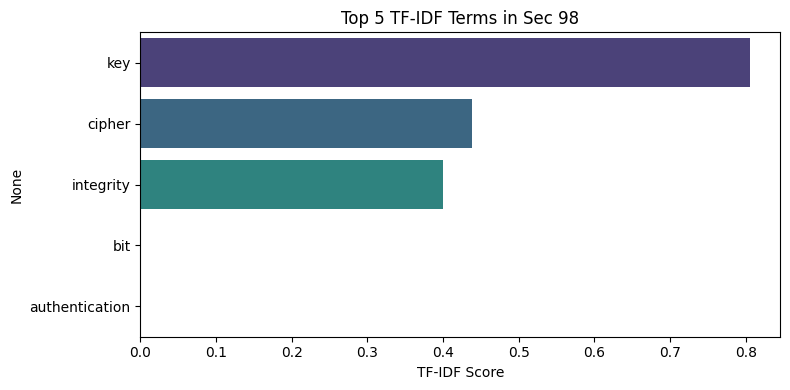

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


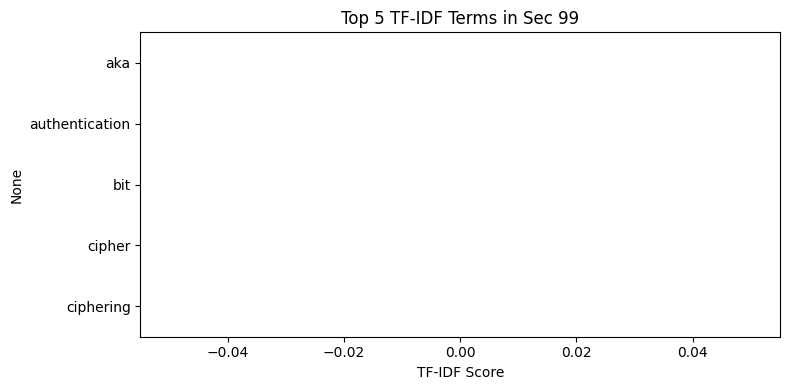

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


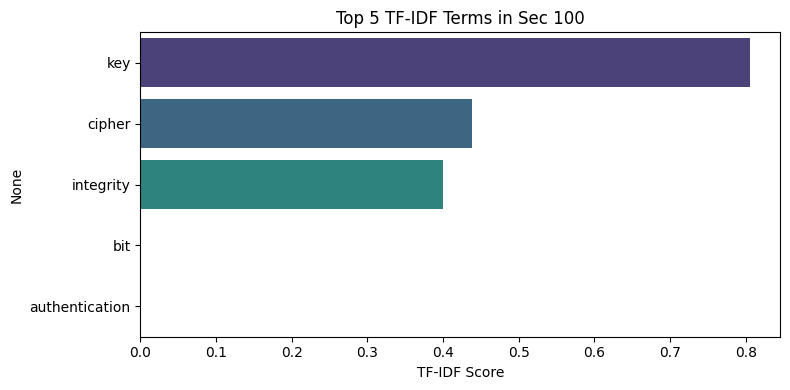

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


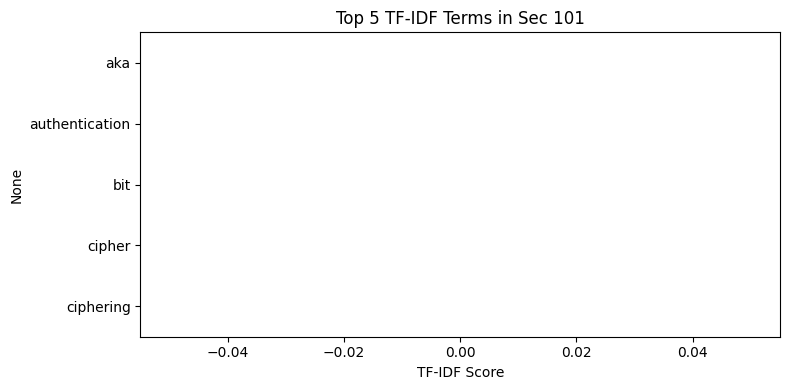

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


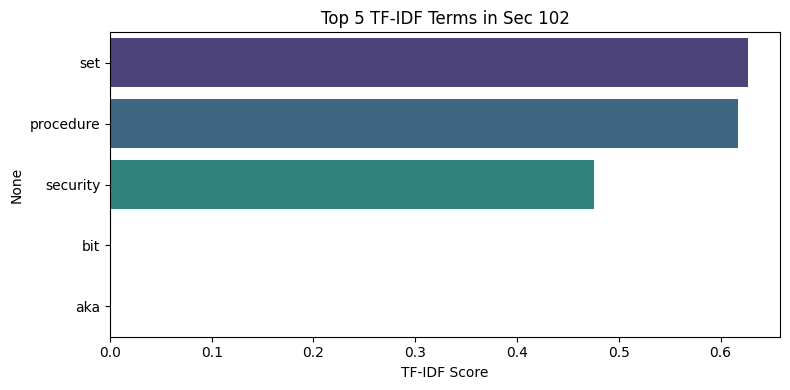

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


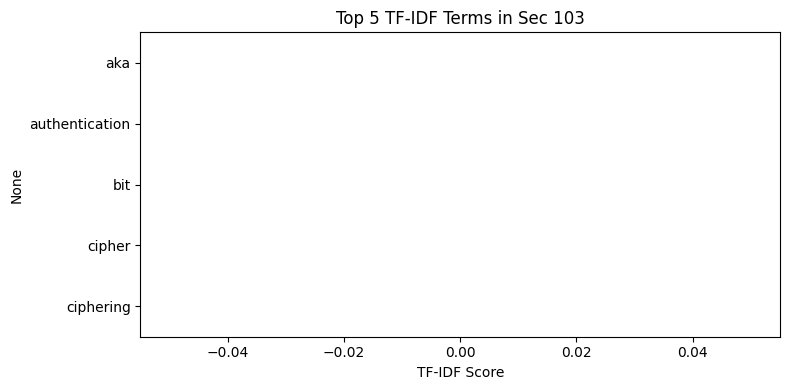

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


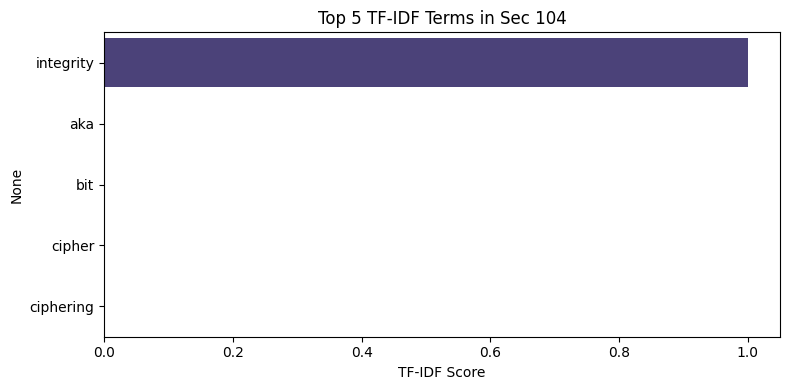

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


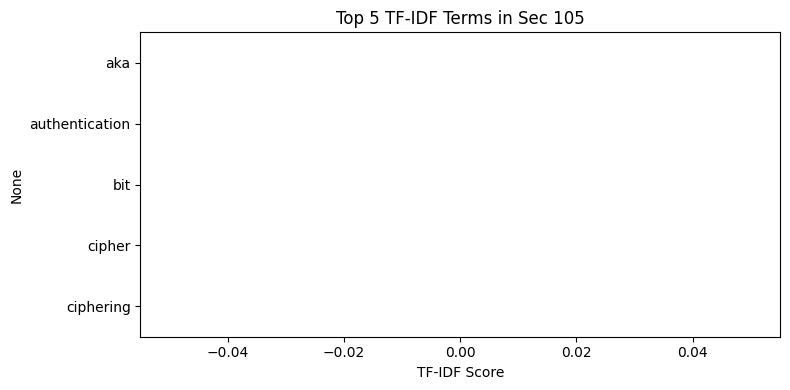

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


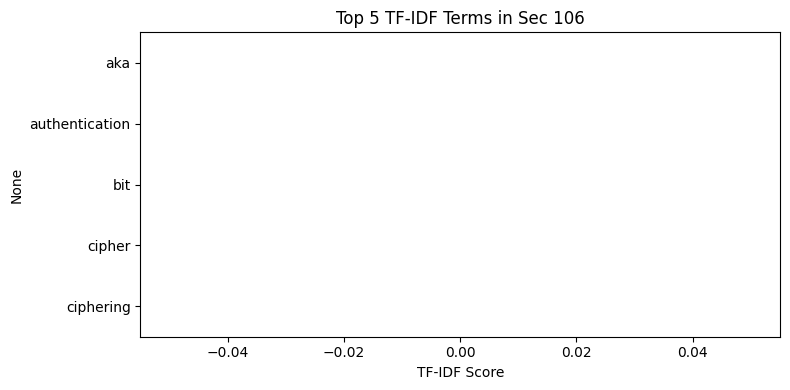

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


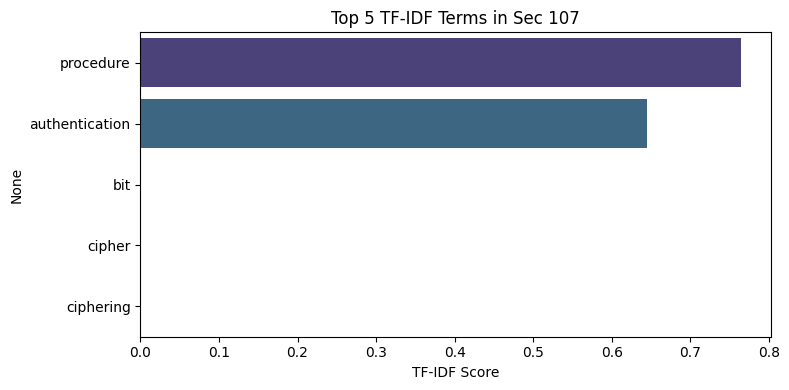

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


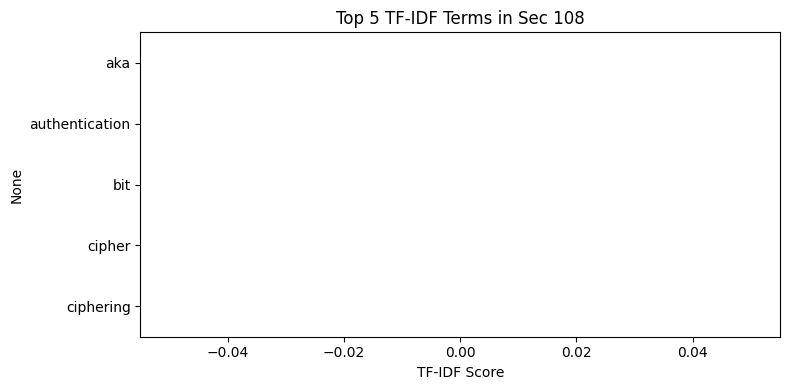

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


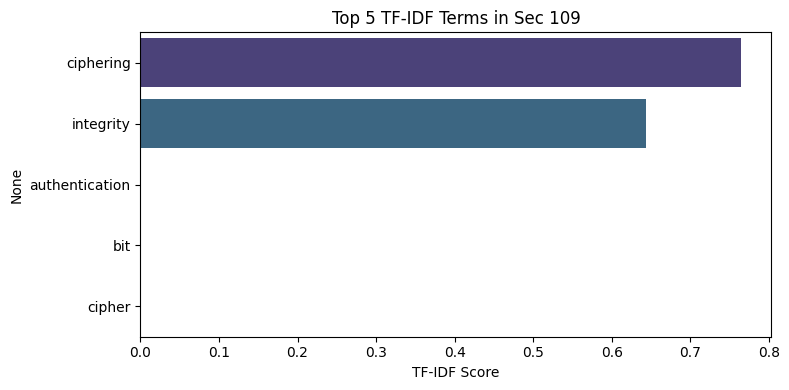

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


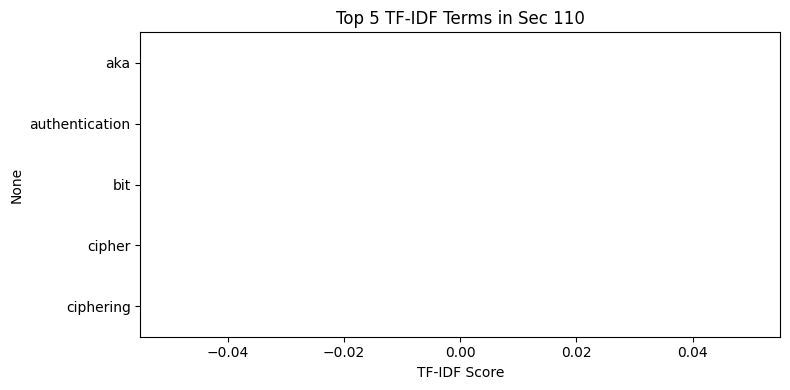

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


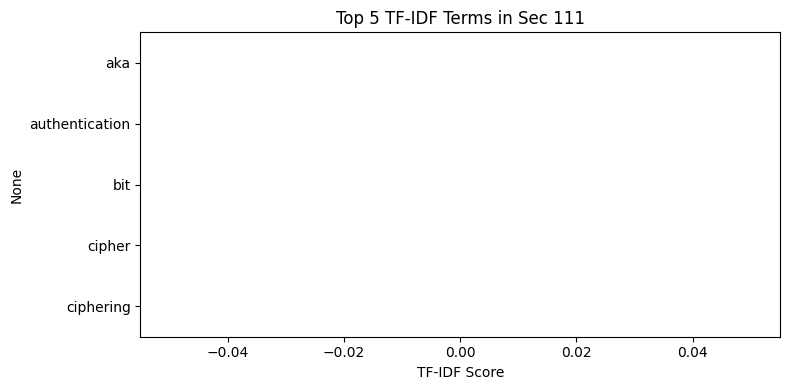

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


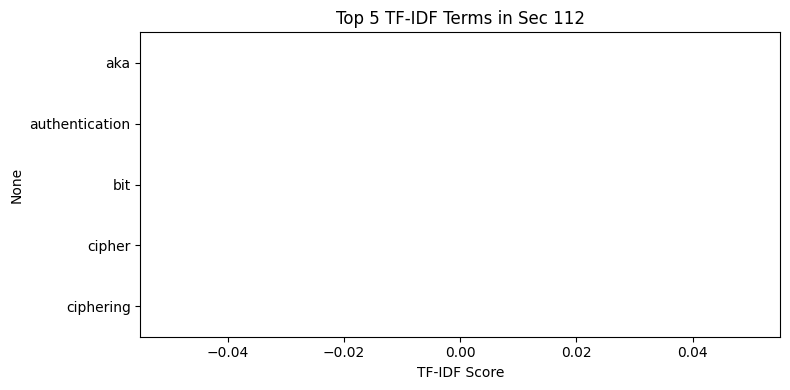

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


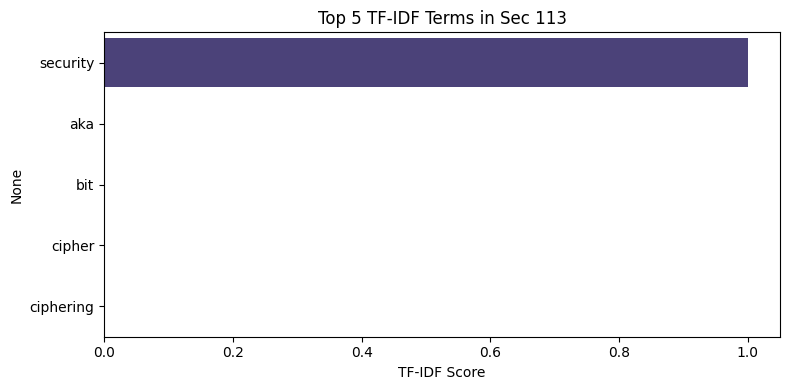

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


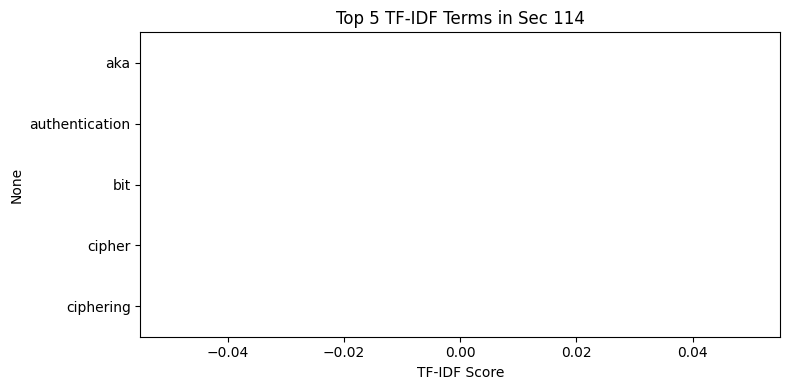

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


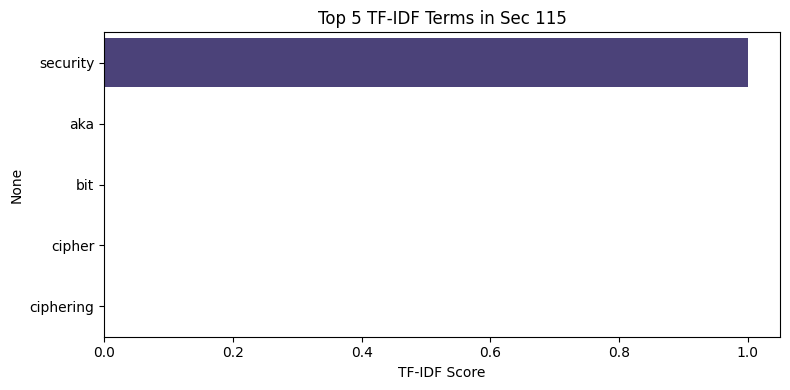

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


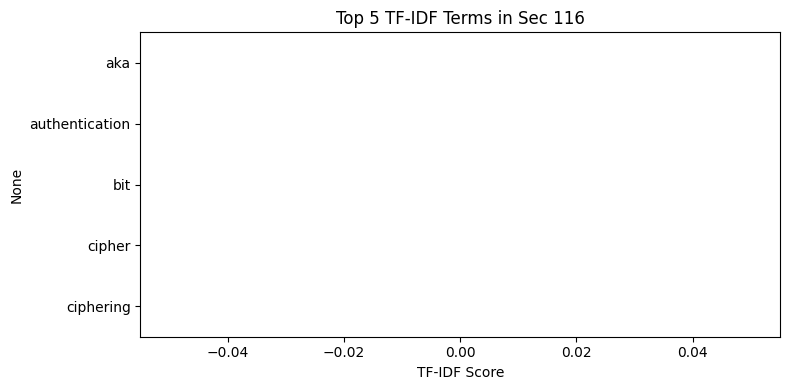

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


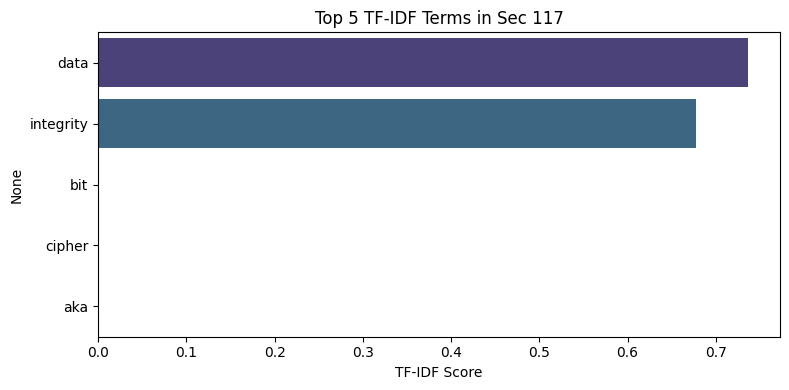

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


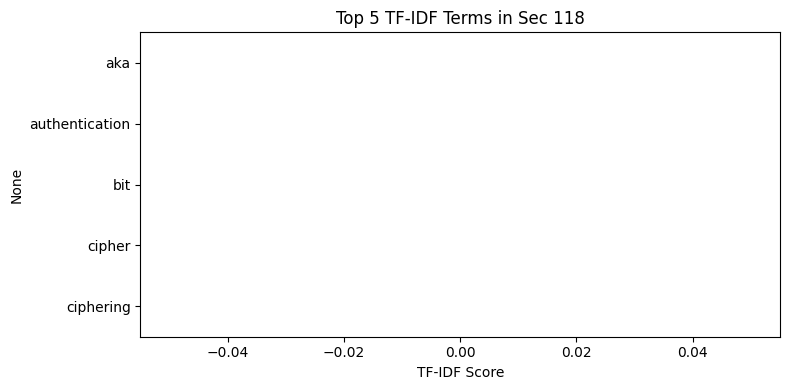

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


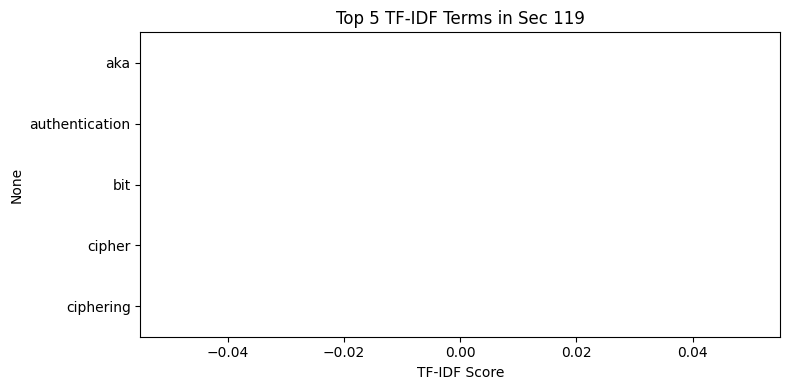

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


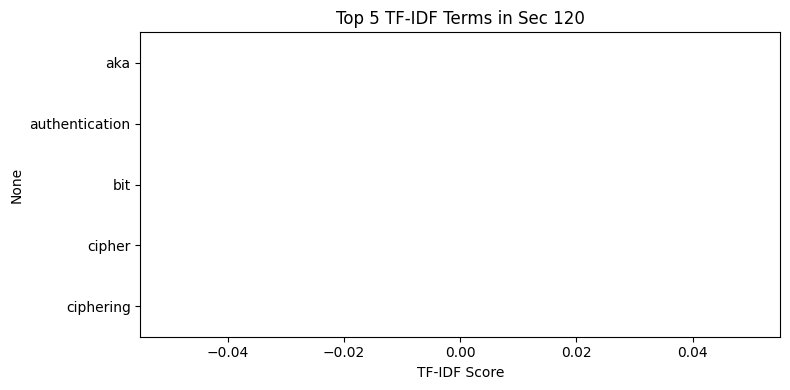

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


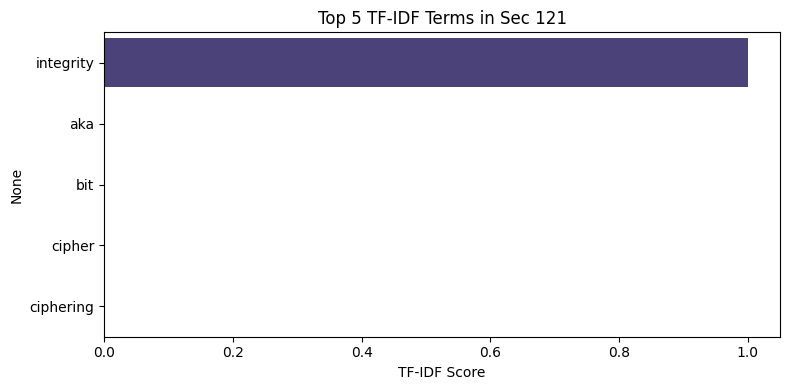

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


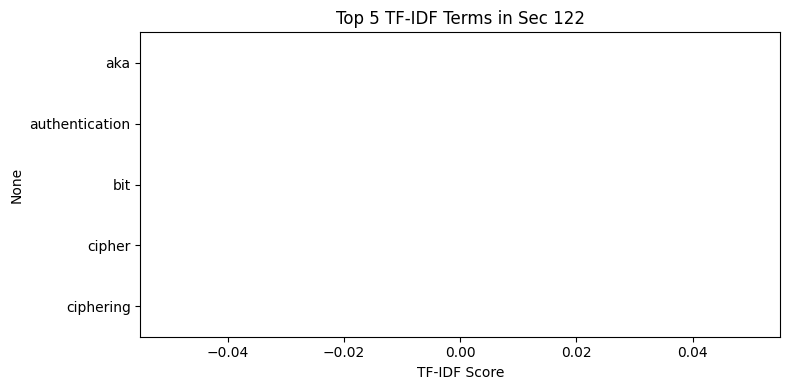

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


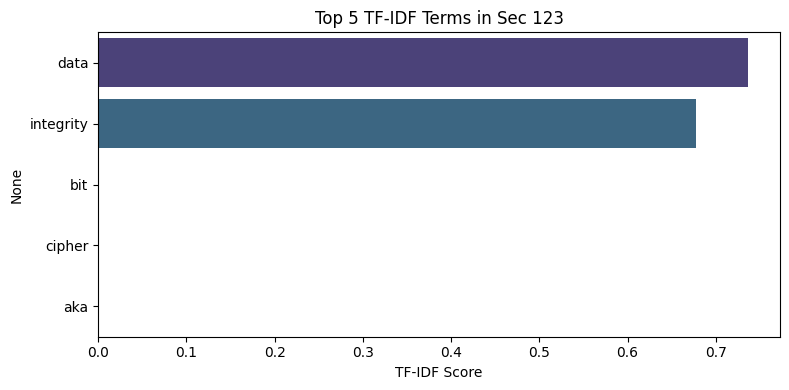

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


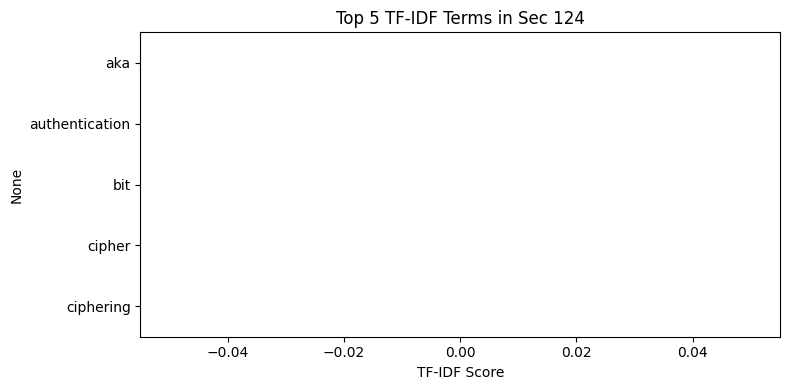

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


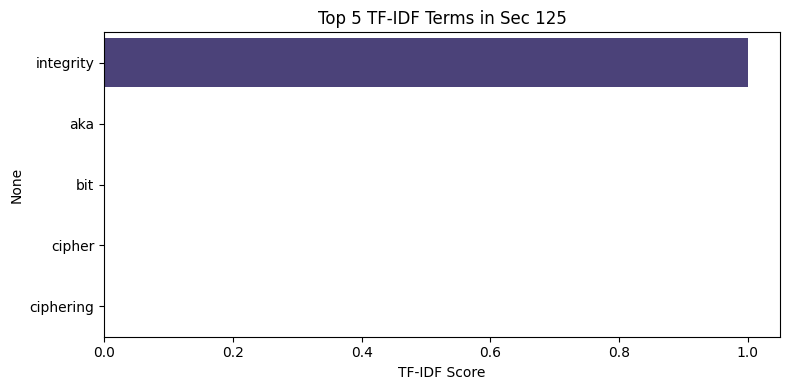

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


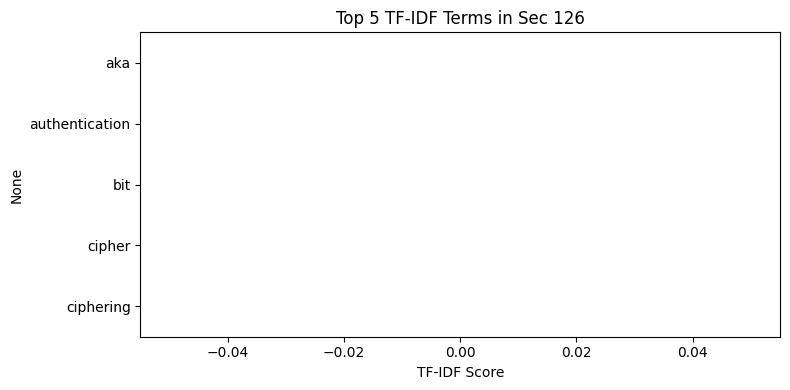

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


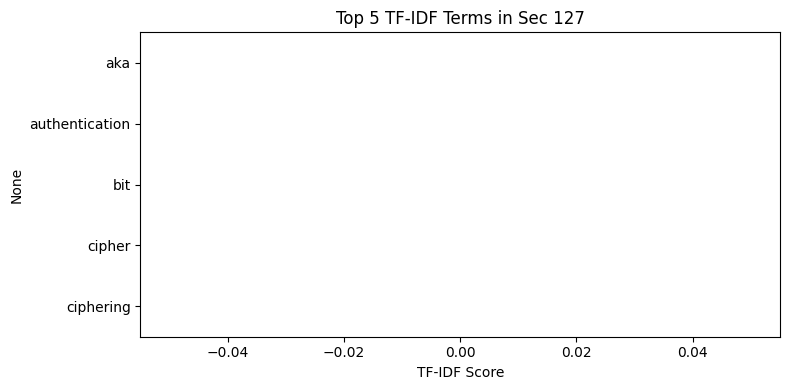

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


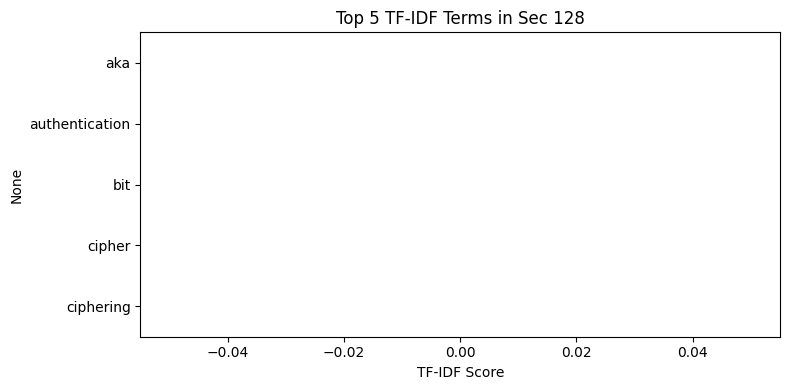

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


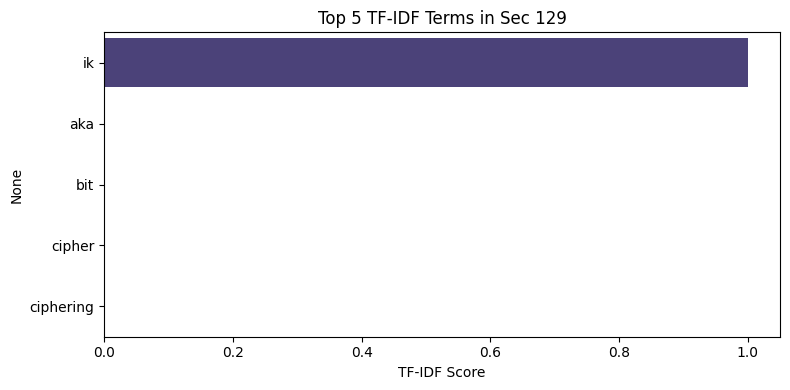

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


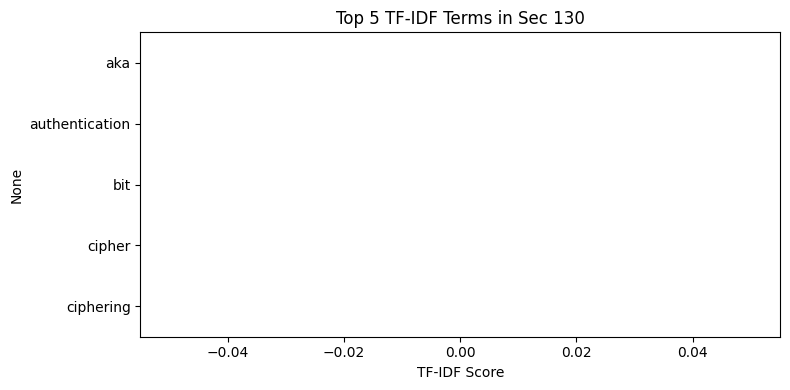

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


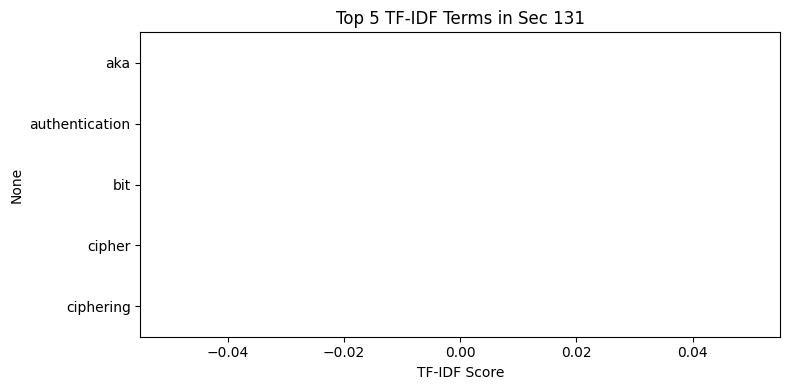

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


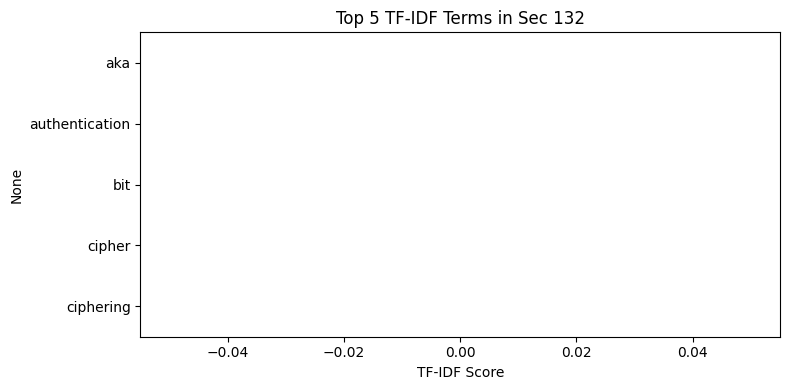

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


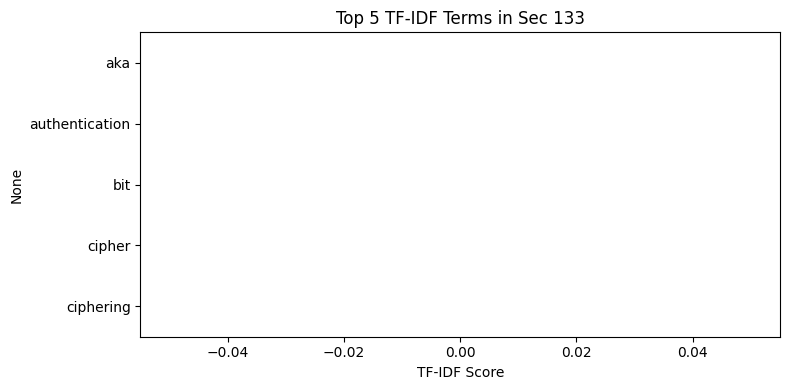

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


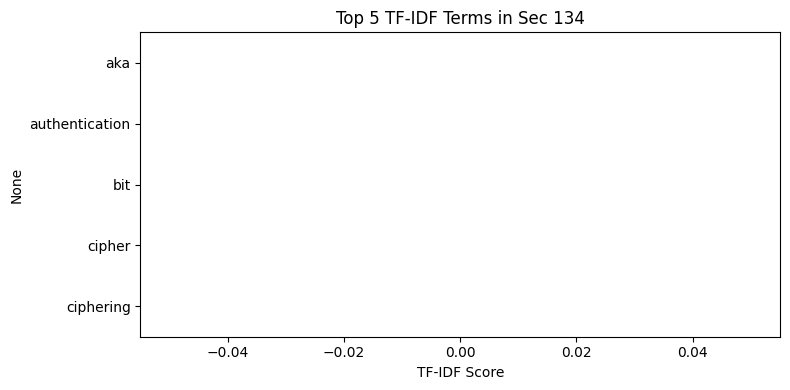

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


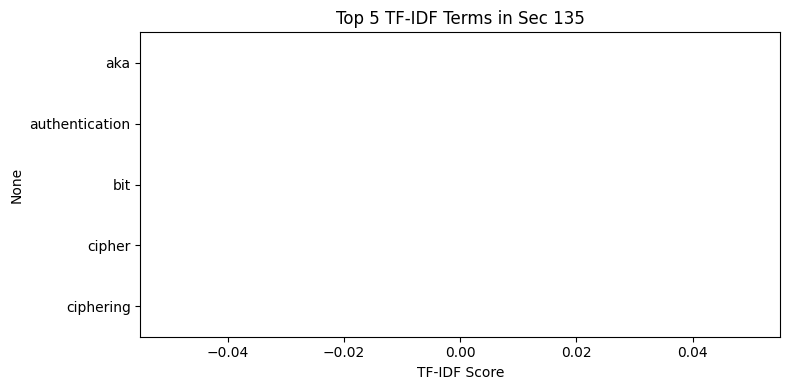

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


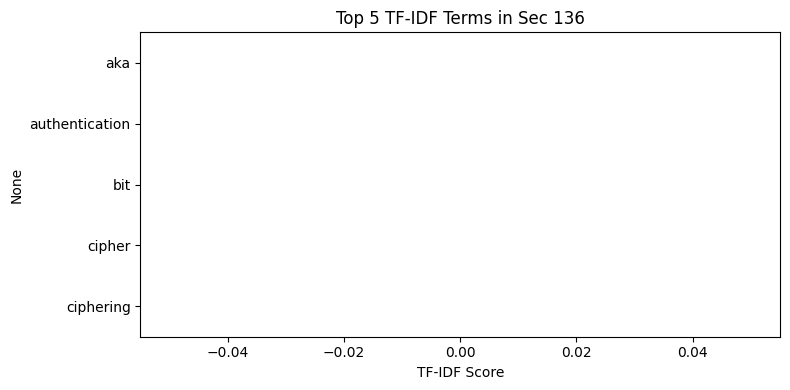

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


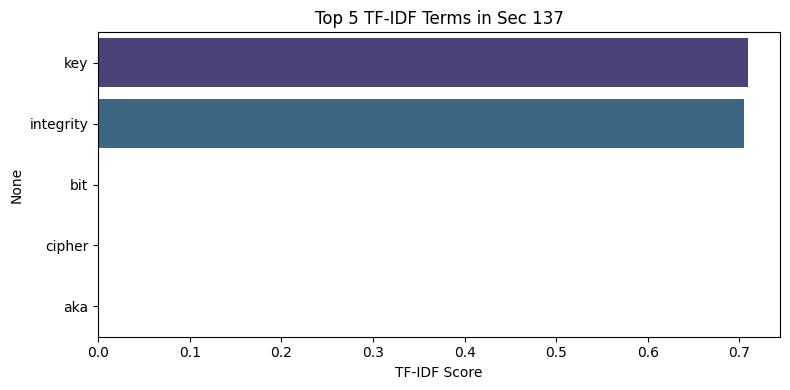

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


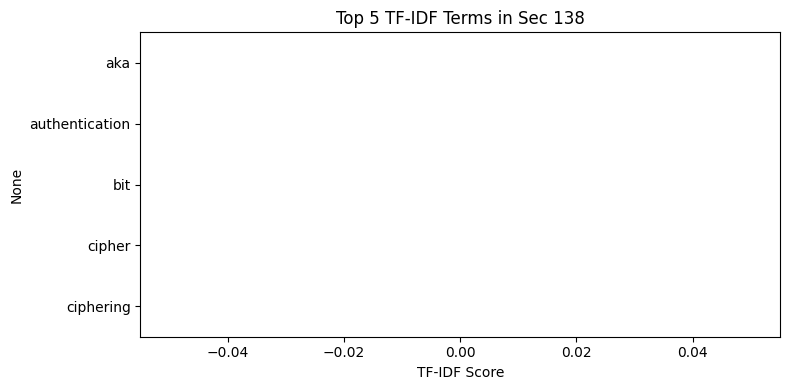

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


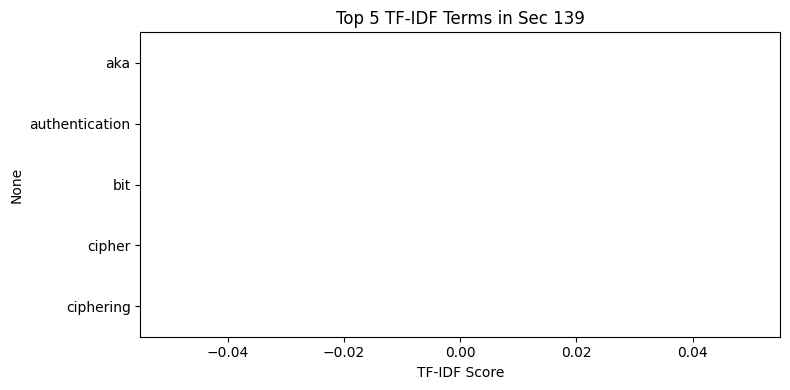

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


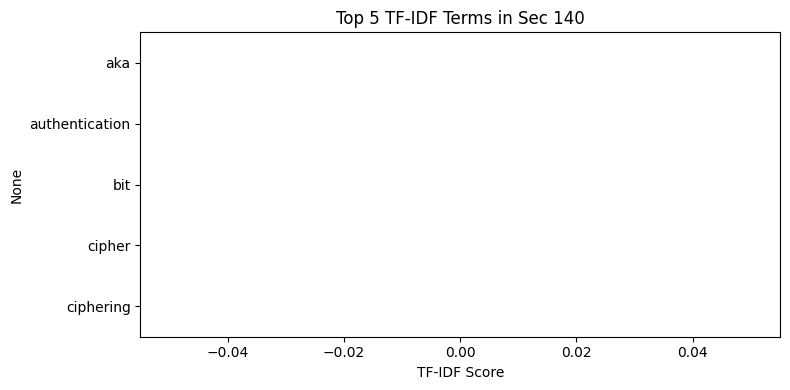

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


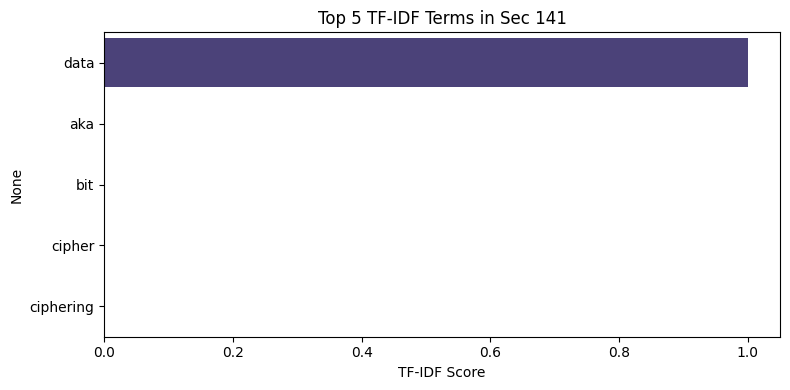

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


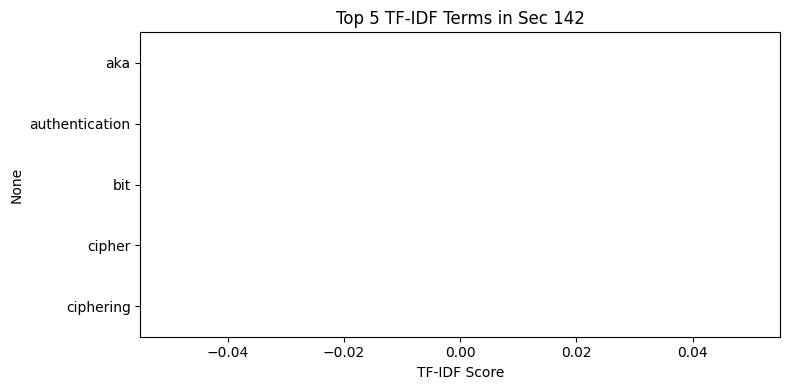

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


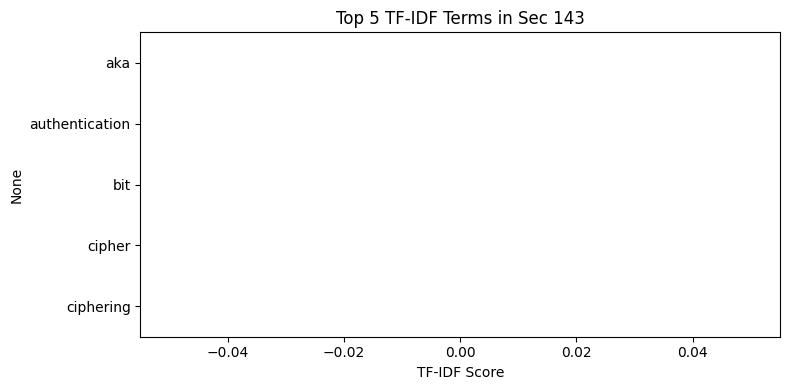

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


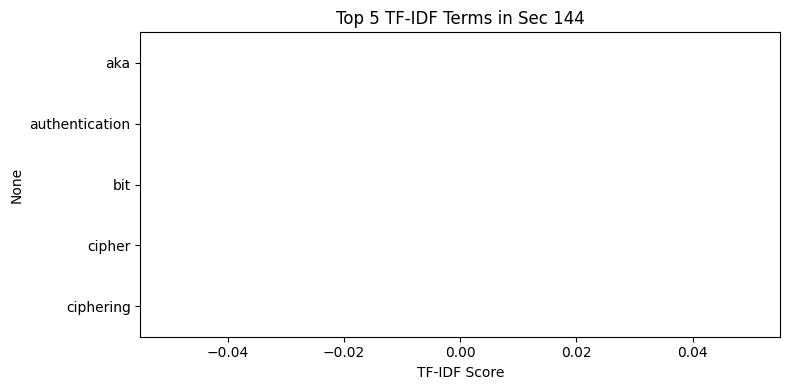

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


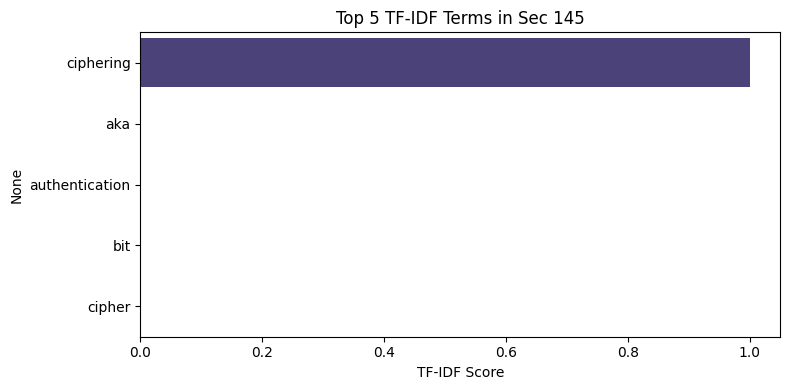

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


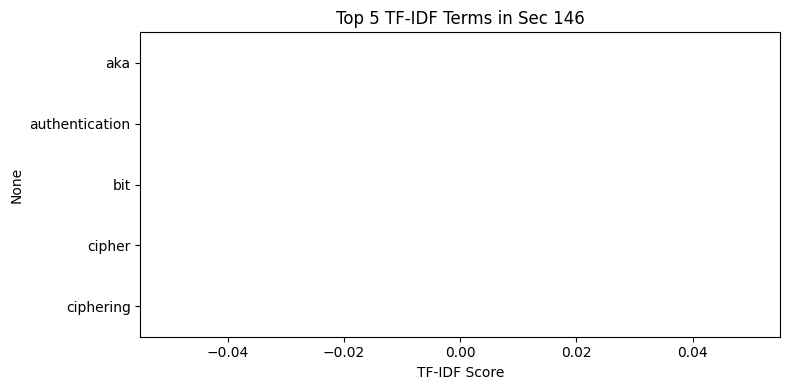

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


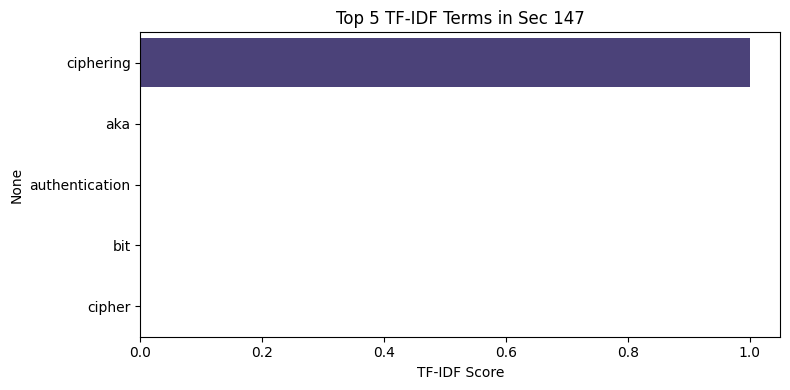

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


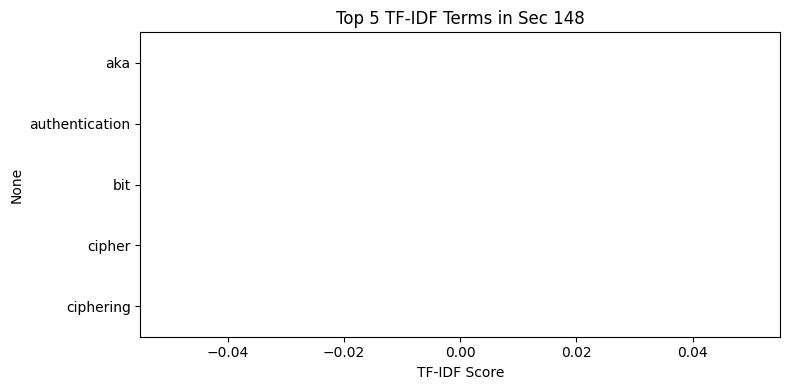

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


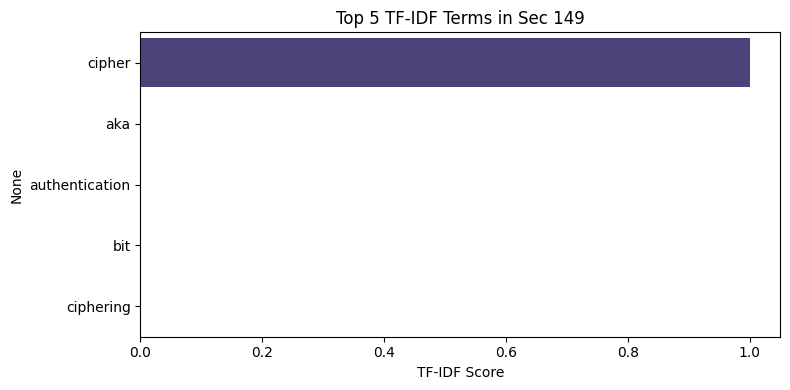

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


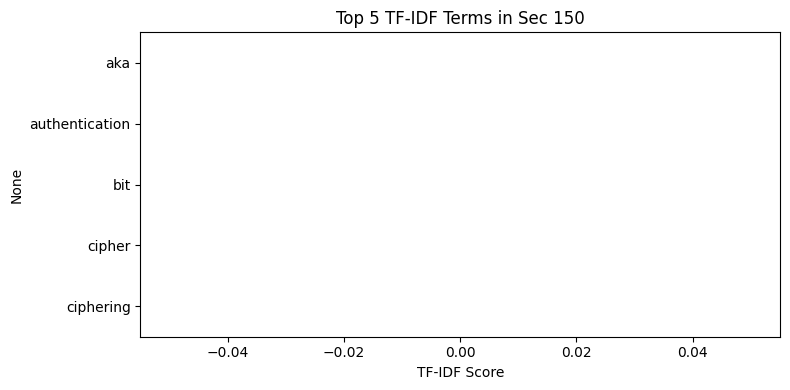

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


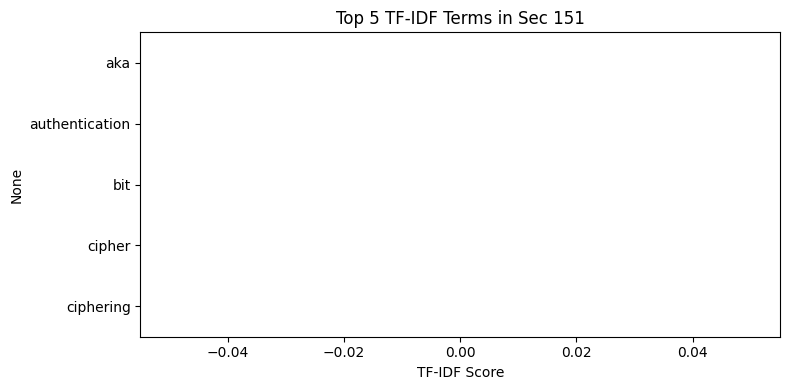

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


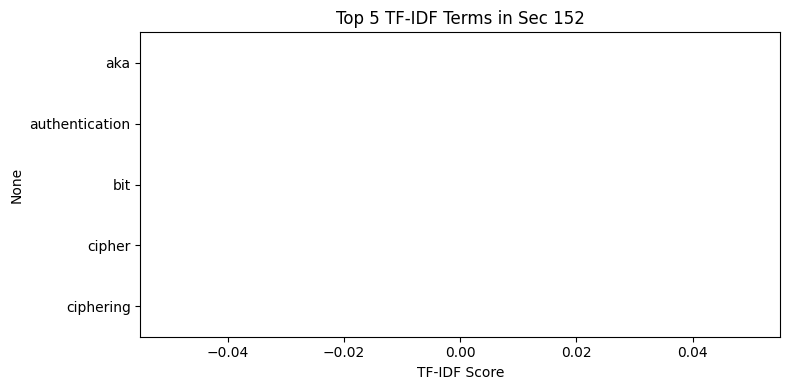

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


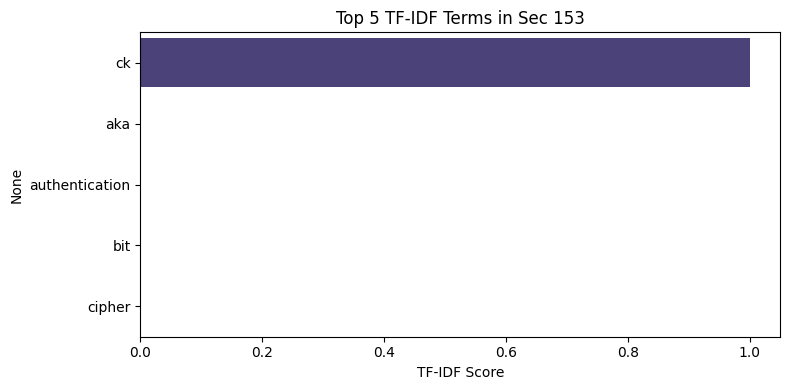

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


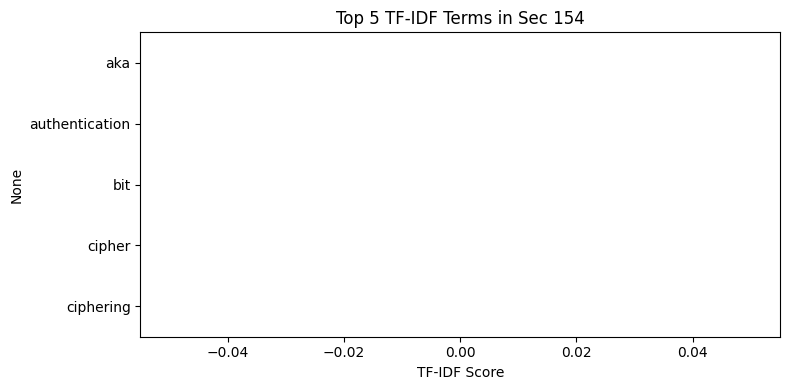

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


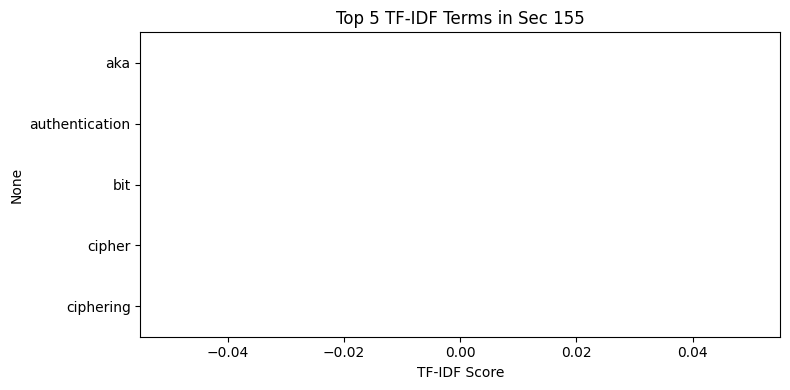

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


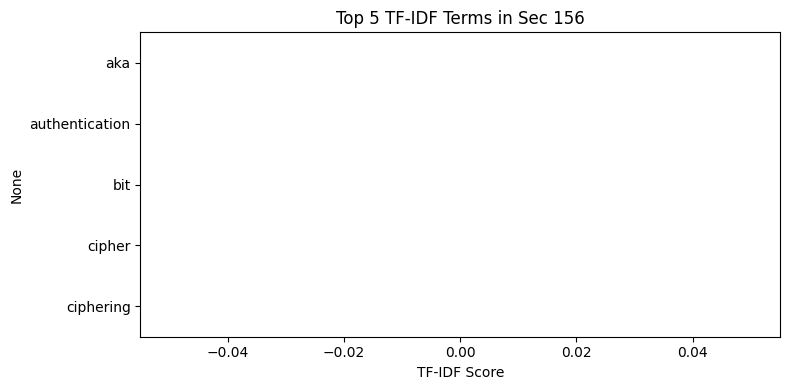

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


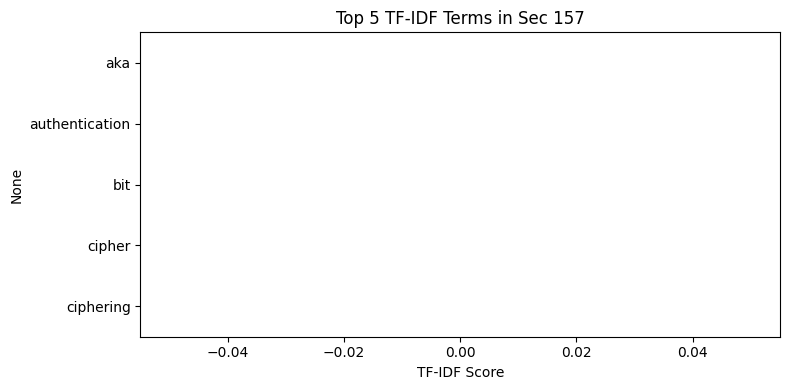

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


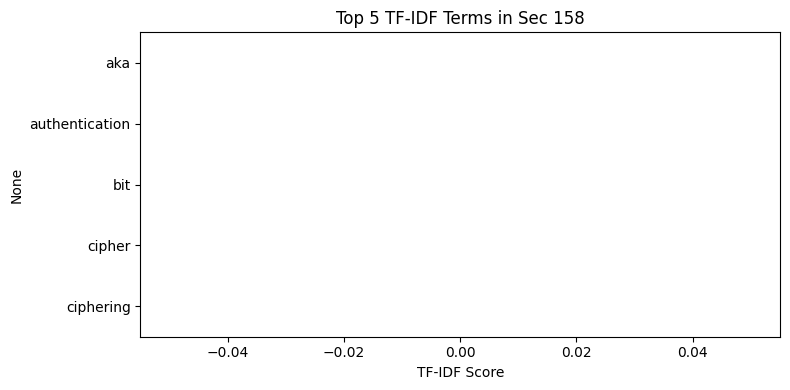

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


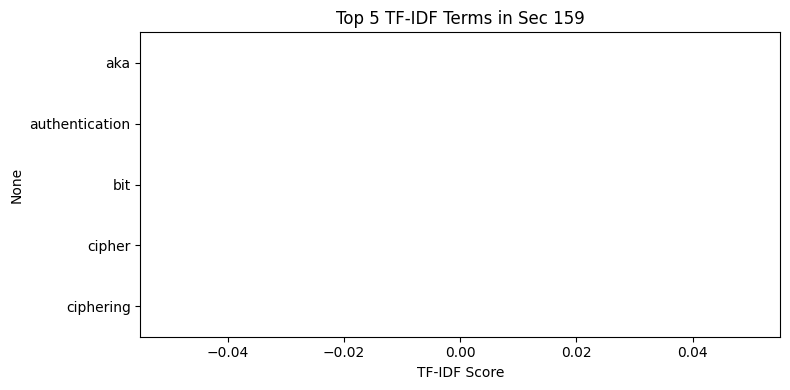

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


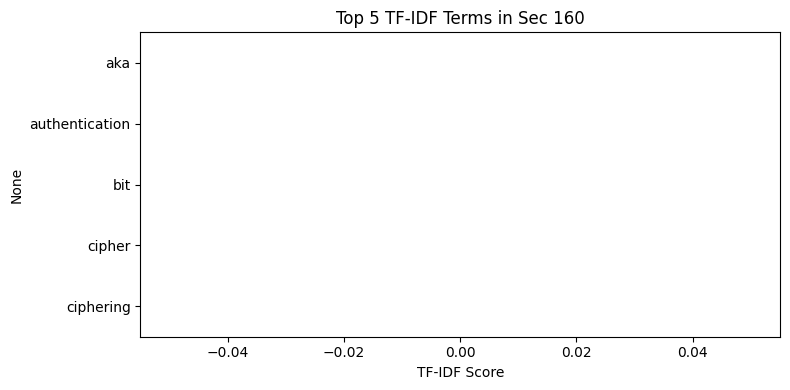

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


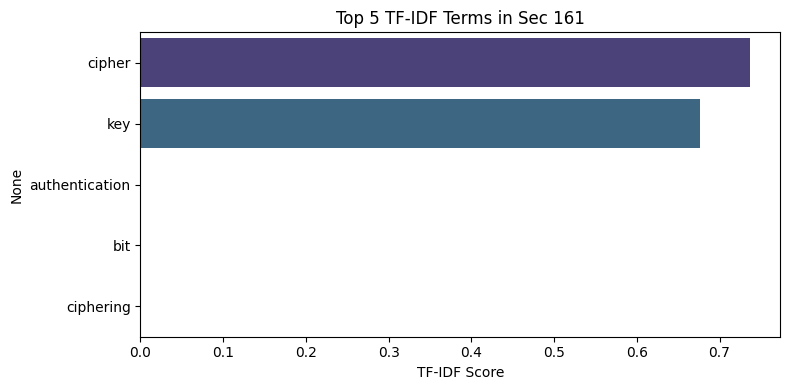

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


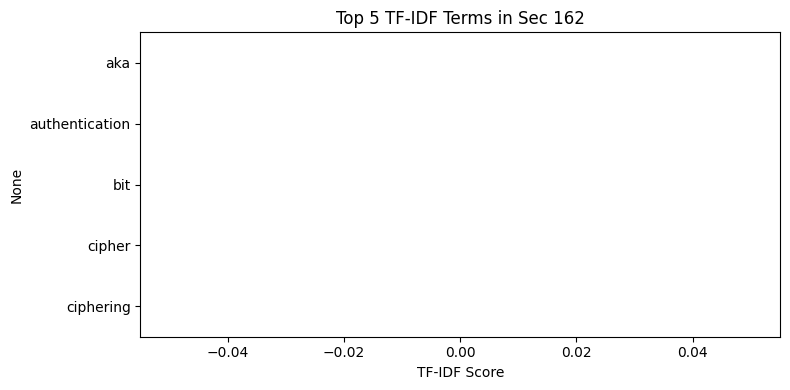

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


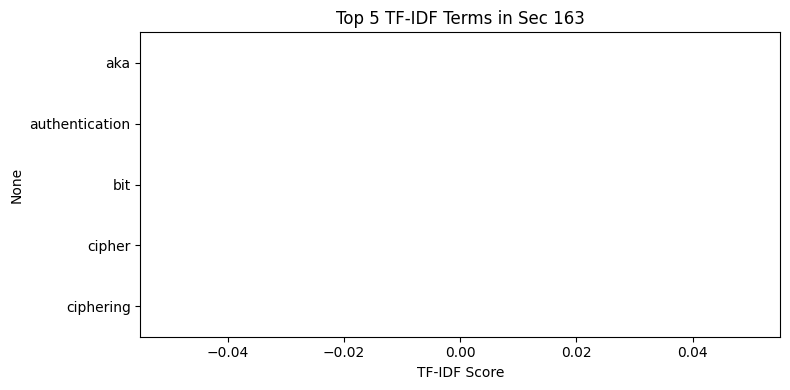

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


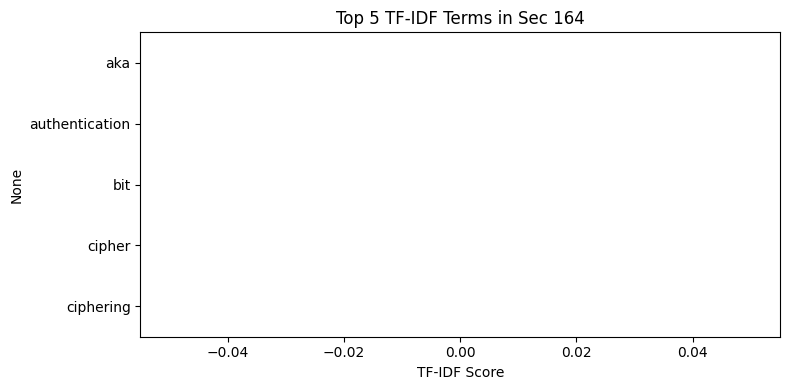

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


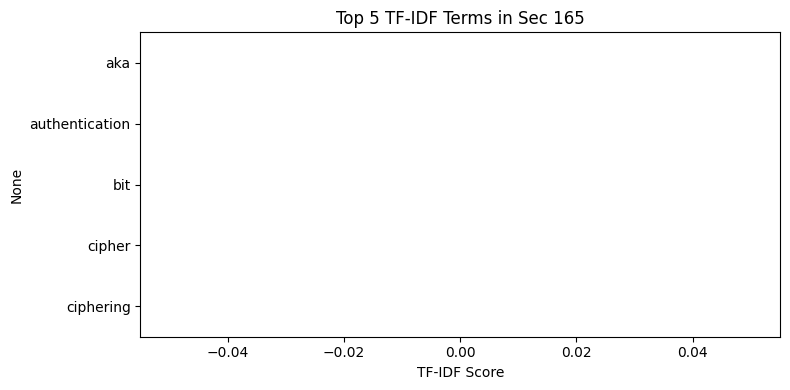

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


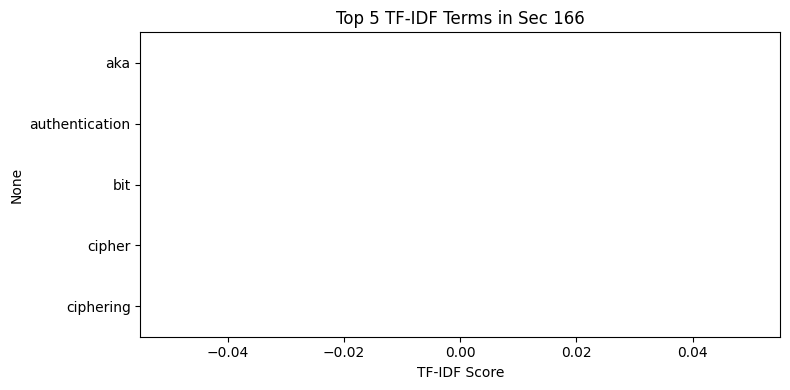

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


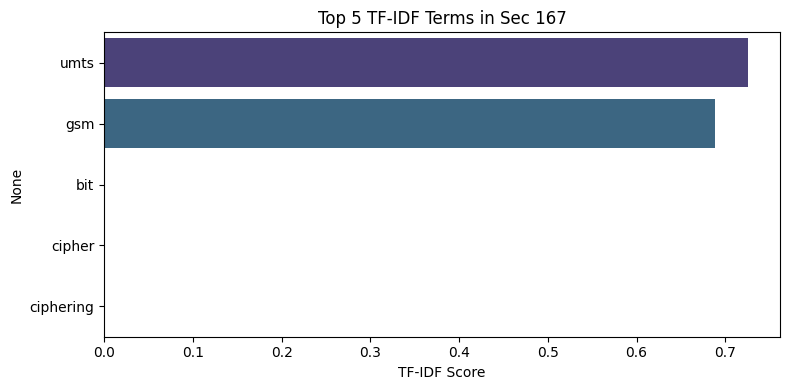

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


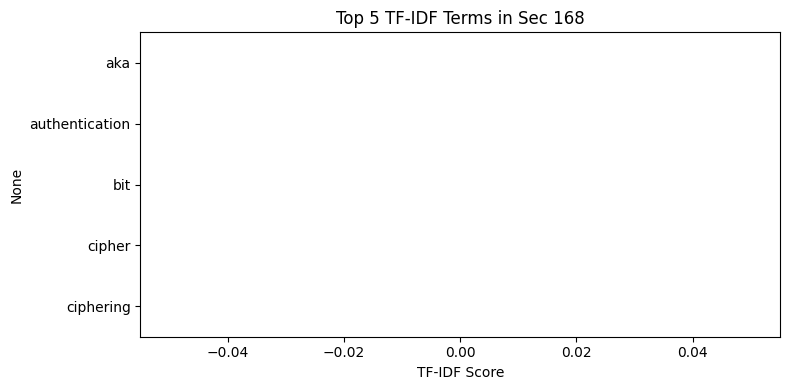

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


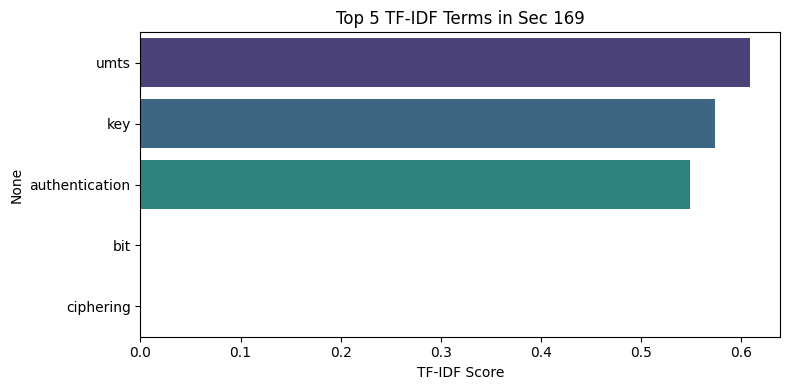

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


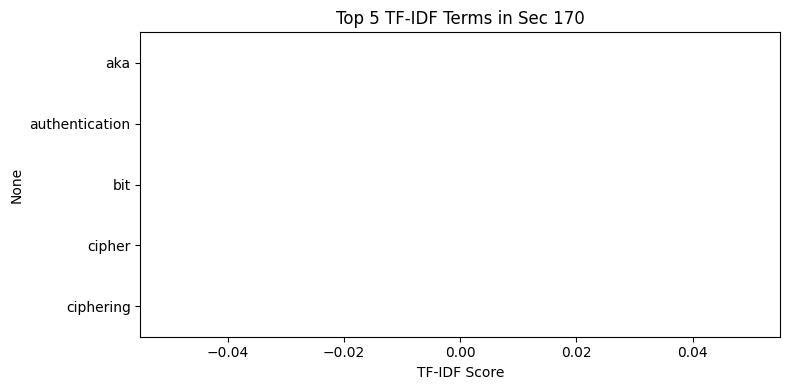

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


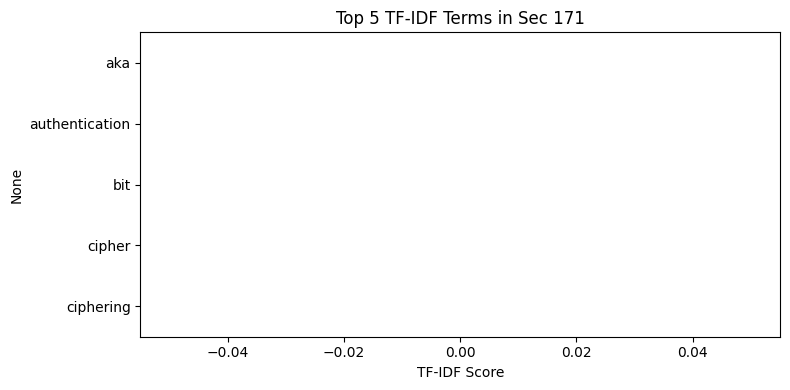

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


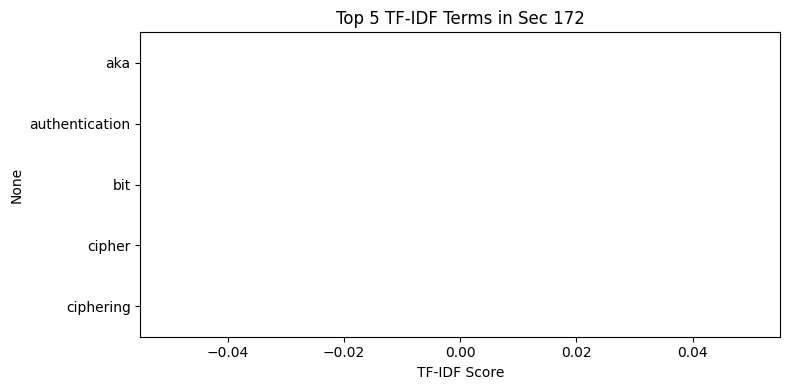

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


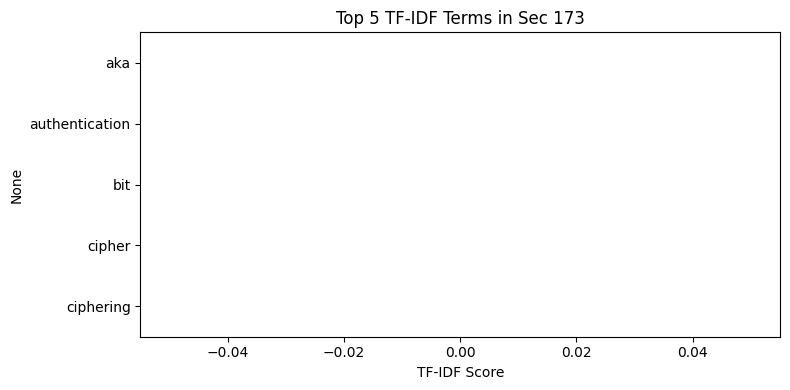

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


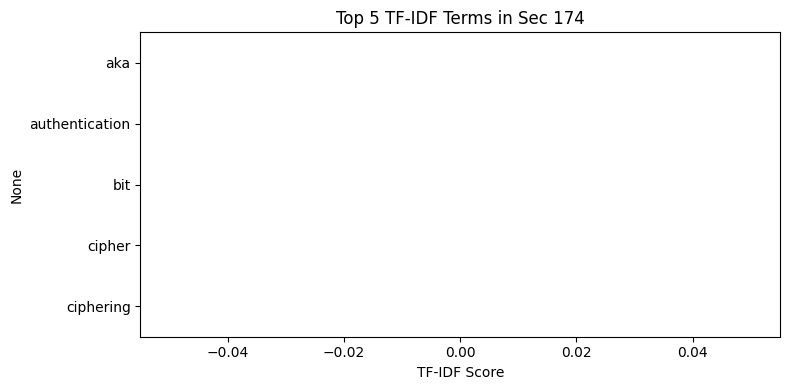

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


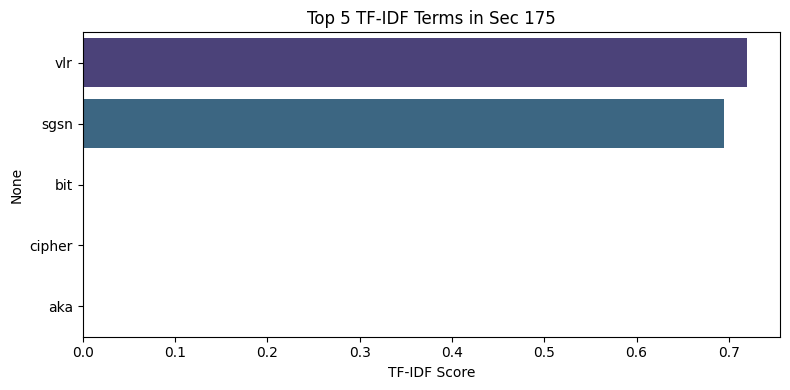

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


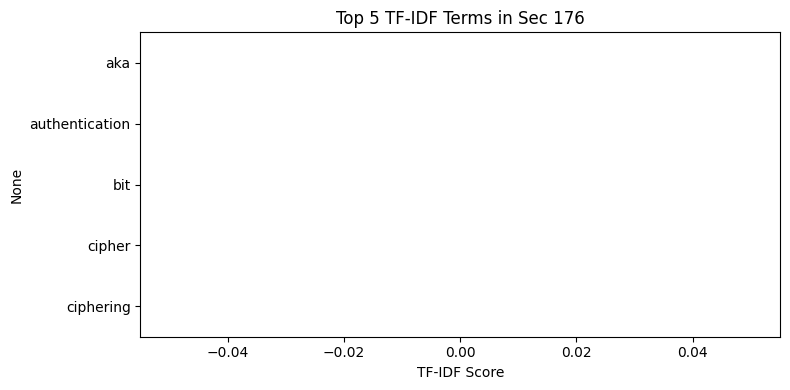

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


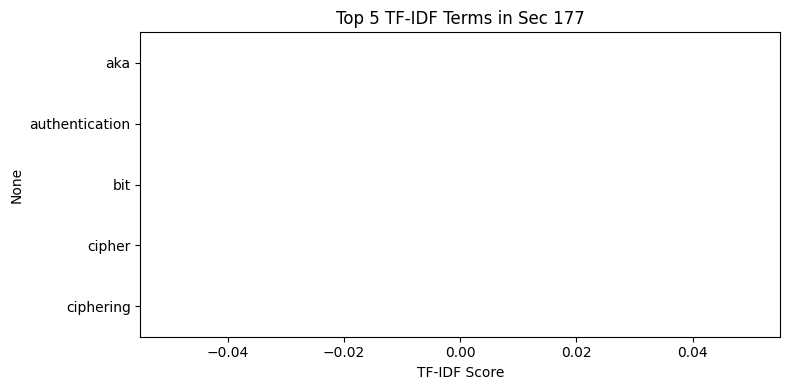

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


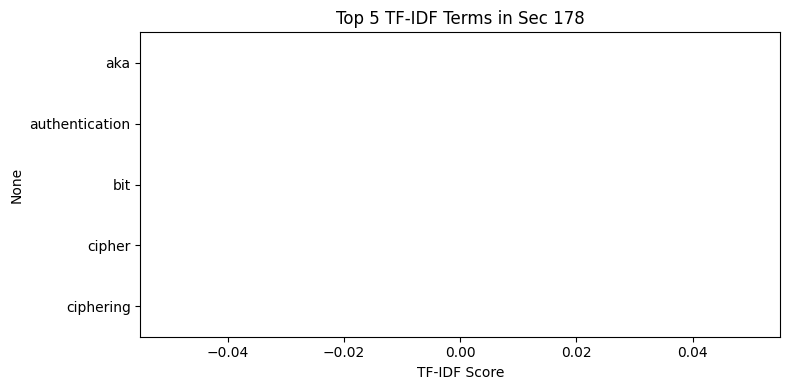

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


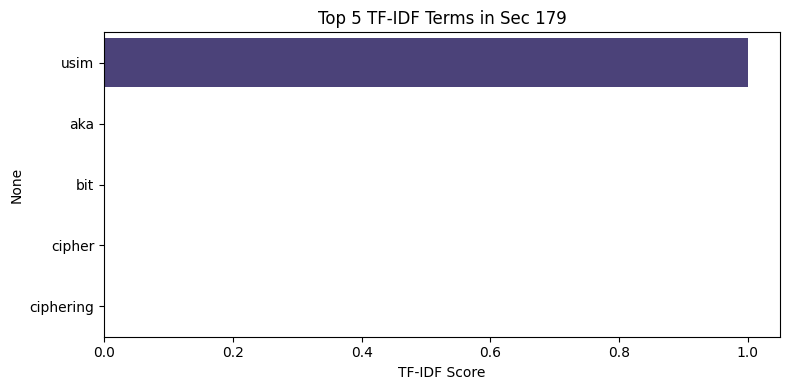

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


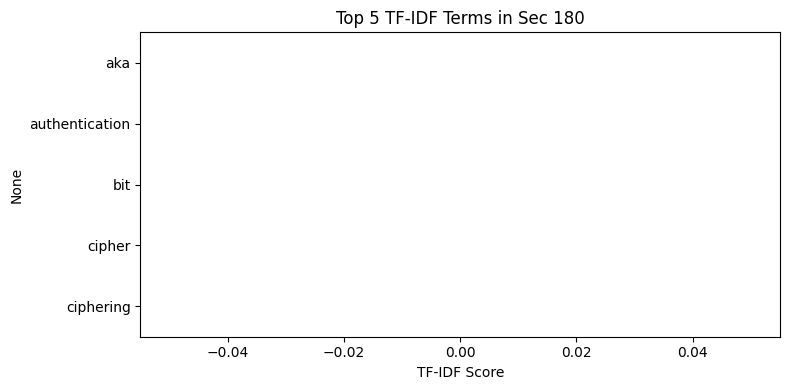

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


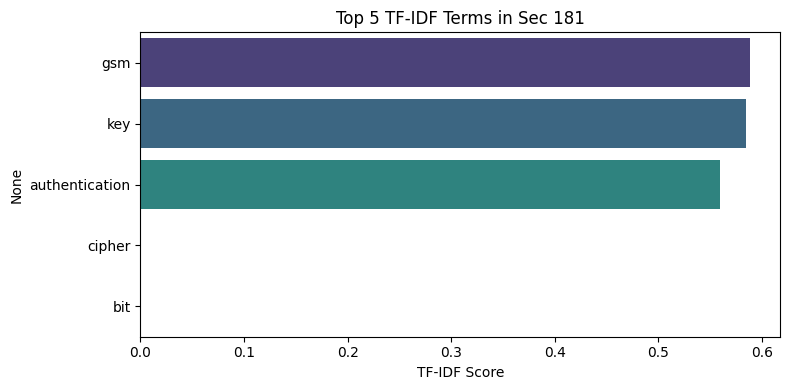

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


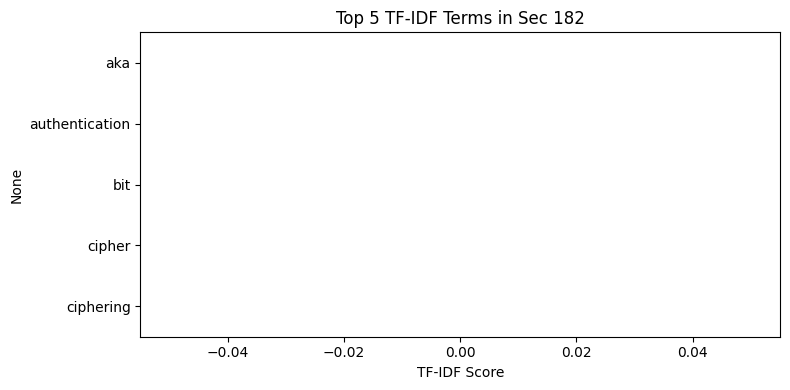

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


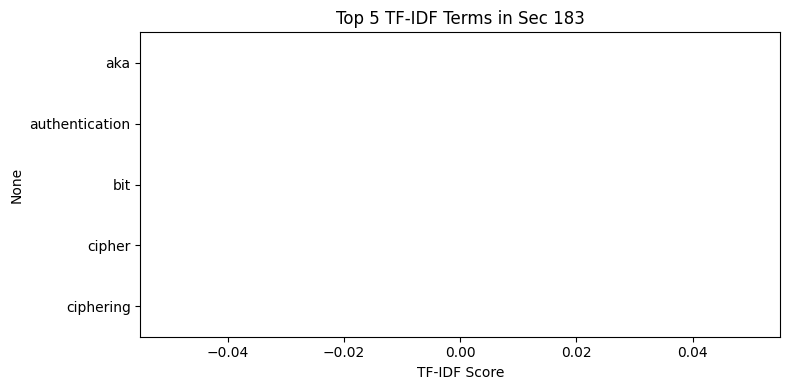

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


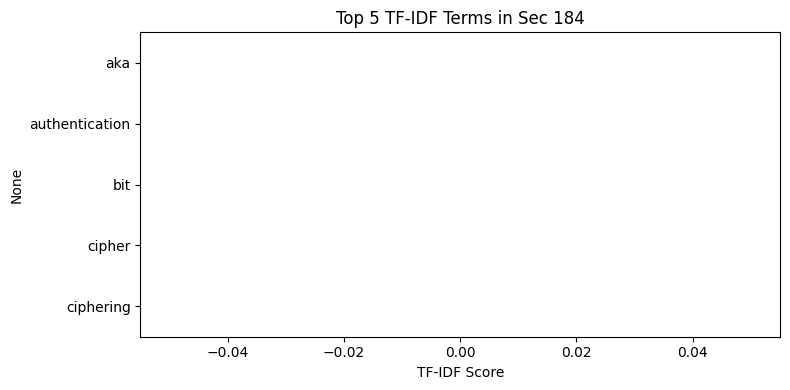

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


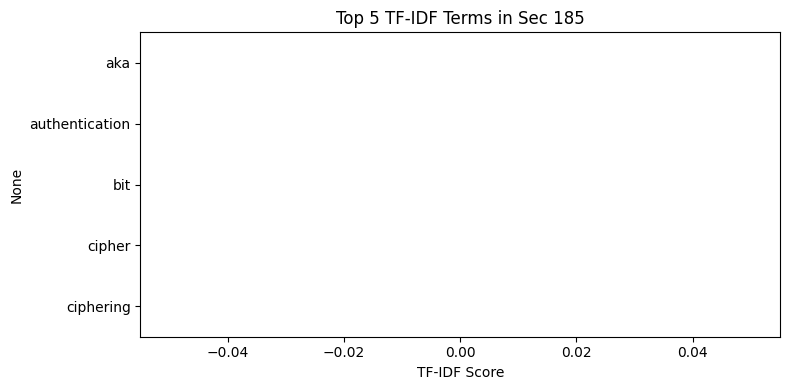

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


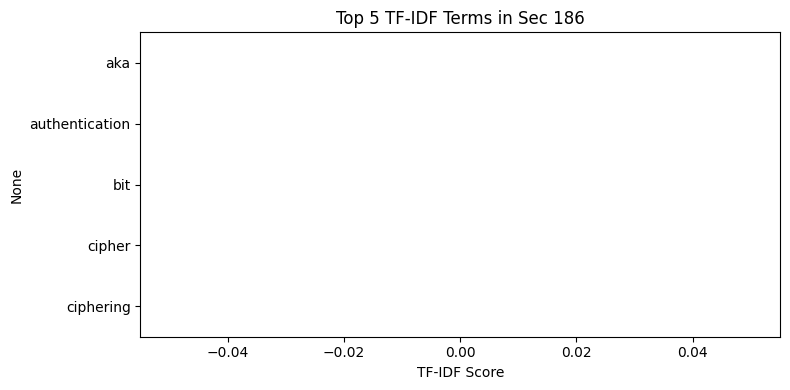

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


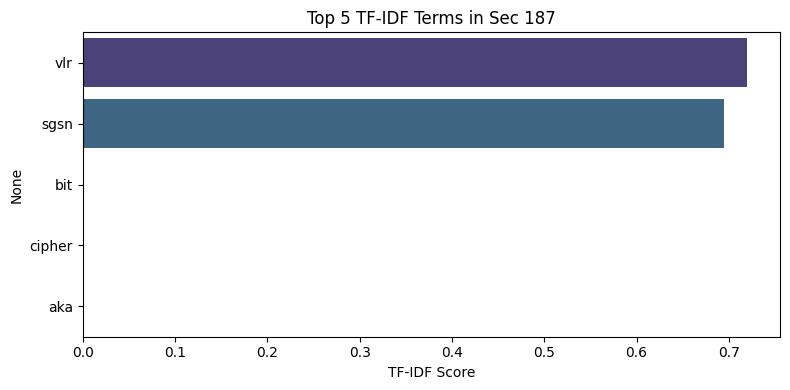

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


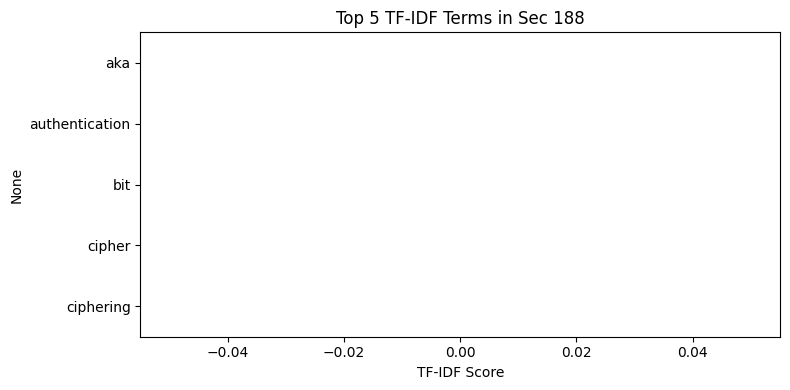

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


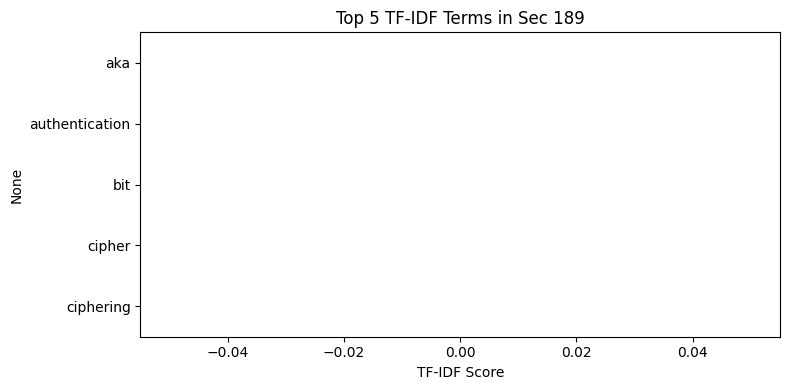

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


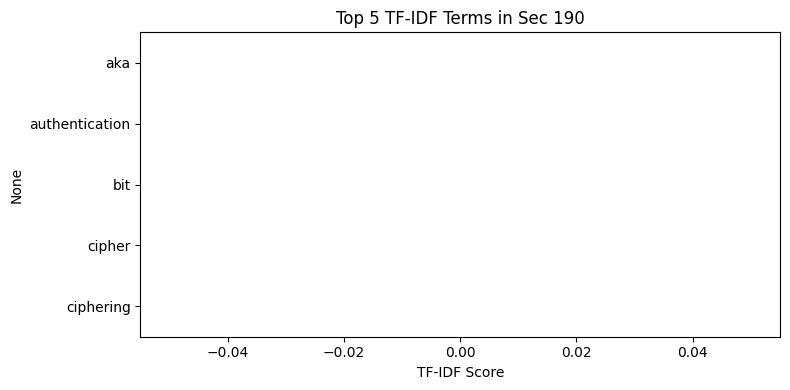

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


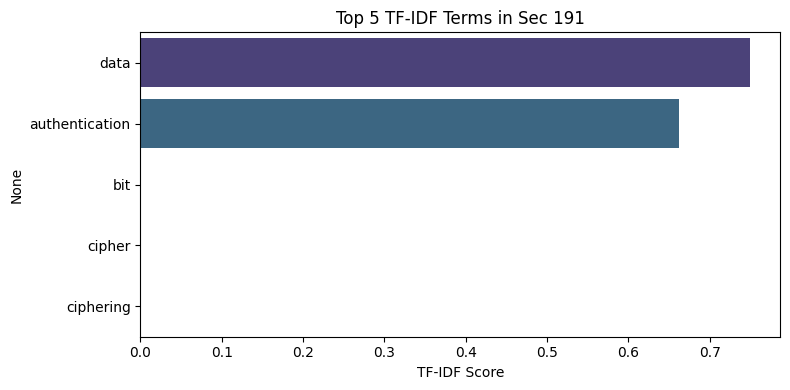

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


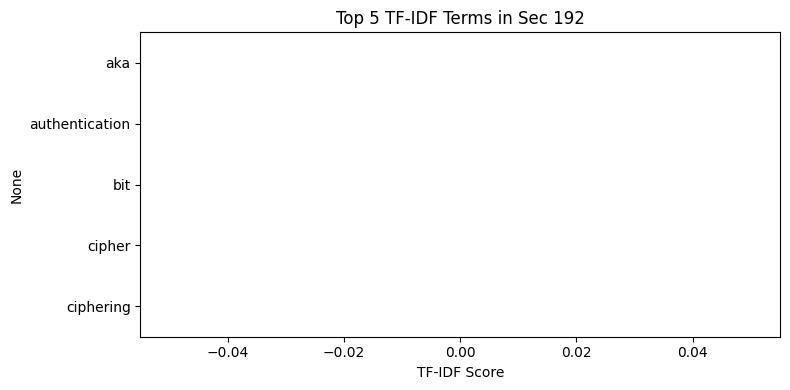

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


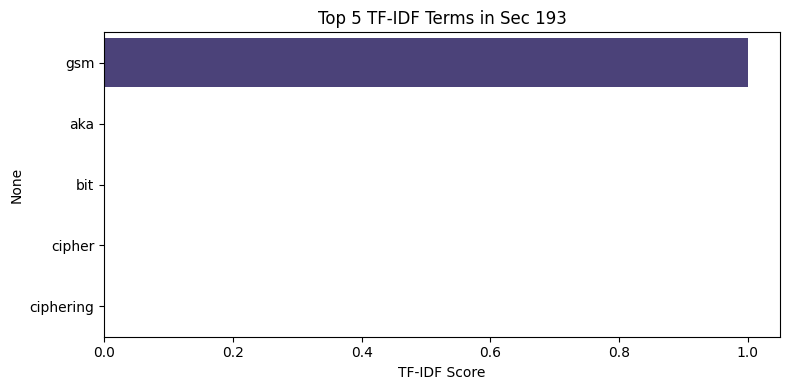

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


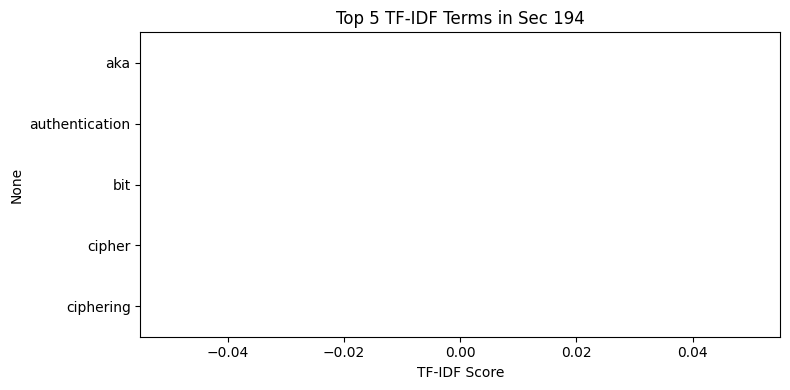

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


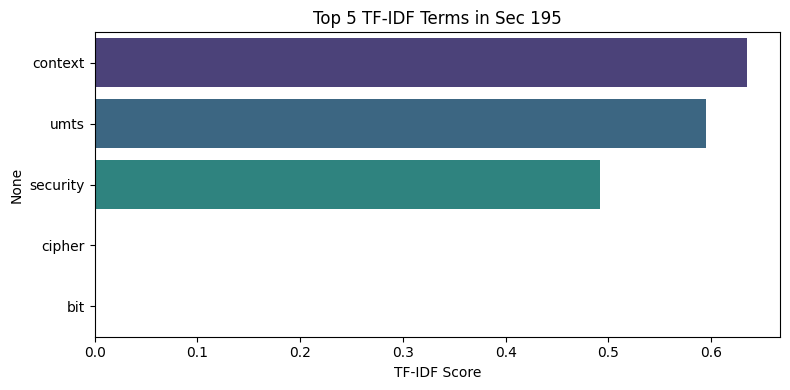

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


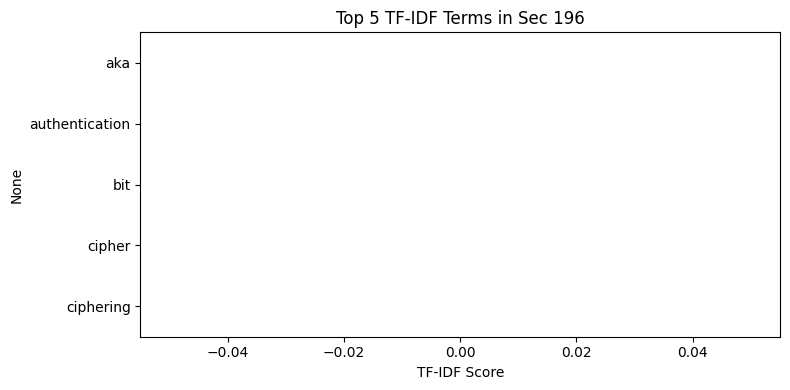

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


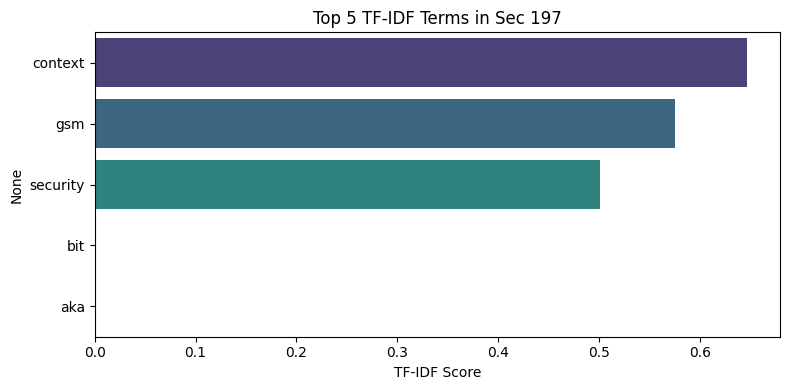

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


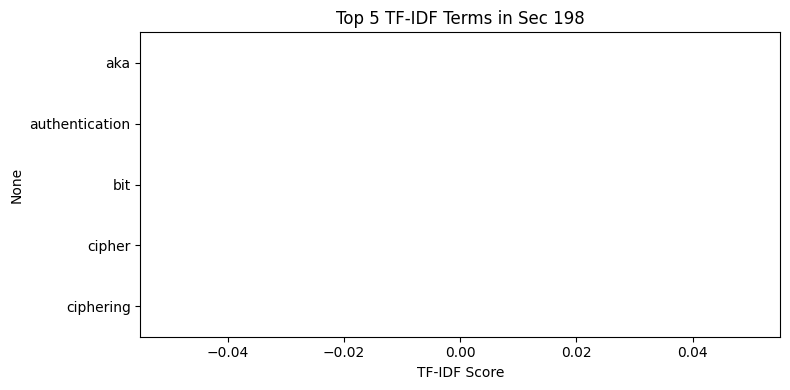

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


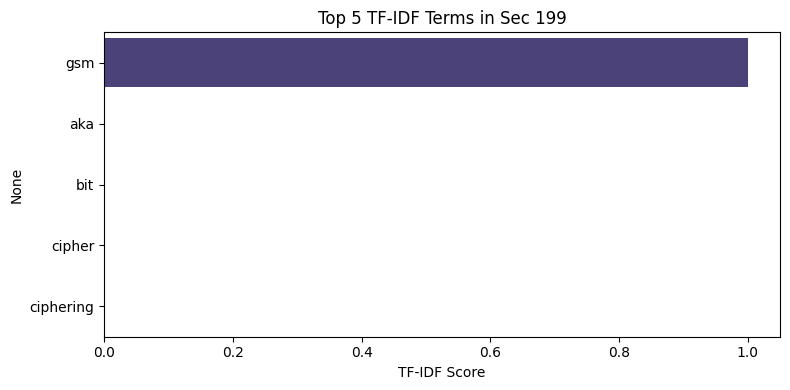

<ipython-input-26-21fb08c701c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")


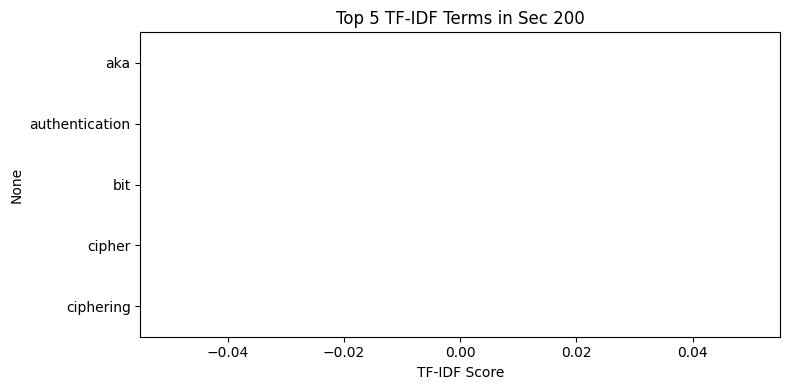

In [26]:
# Limit to first N sections (e.g., 5, 10 or even 3000)
num_sections_to_plot = 200

for i, row in tfidf_df.head(num_sections_to_plot).iterrows():
    top_terms = row.sort_values(ascending=False)[:top_n]
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_terms.values, y=top_terms.index, palette="viridis")
    plt.title(f"Top {top_n} TF-IDF Terms in {i}")
    plt.xlabel("TF-IDF Score")
    plt.tight_layout()
    plt.show()


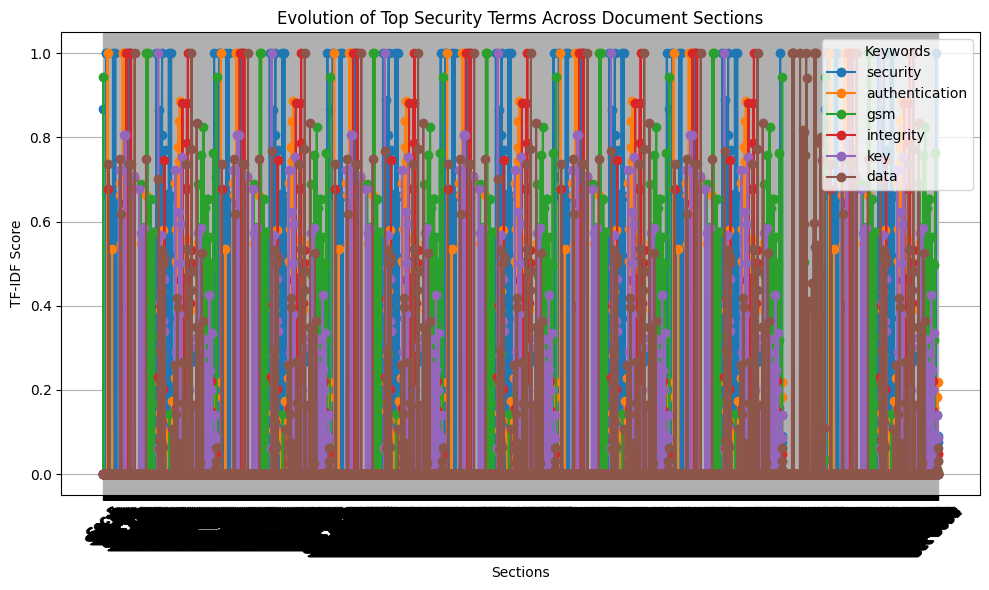

In [19]:
import matplotlib.pyplot as plt

# Calculate total TF-IDF score for each term across all sections
top_terms = tfidf_df.sum().sort_values(ascending=False).head(6).index  # You can change number of terms

# Plot their evolution
plt.figure(figsize=(10, 6))
for term in top_terms:
    plt.plot(tfidf_df.index, tfidf_df[term], marker='o', label=term)

plt.title("Evolution of Top Security Terms Across Document Sections")
plt.xlabel("Sections")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.legend(title="Keywords")
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
import plotly.graph_objs as go
import plotly.io as pio

# Define top terms again (if not already available)
top_terms = tfidf_df.sum().sort_values(ascending=False).head(6).index

# Create figure
fig = go.Figure()

for term in top_terms:
    fig.add_trace(go.Scatter(
        x=tfidf_df.index,
        y=tfidf_df[term],
        mode='lines+markers',
        name=term,
        hoverinfo='x+y+name',
        line=dict(width=2)
    ))

# Add layout styling
fig.update_layout(
    title="TF-IDF Trend of Top Security Terms Across Document Sections",
    xaxis_title="Document Sections",
    yaxis_title="TF-IDF Score",
    legend_title="Keywords",
    hovermode="x unified",
    template="plotly_white",
    height=600
)

# Show in notebook and save
fig.show()
pio.write_html(fig, file="tf-idf_plot_byPlotly.html", auto_open=False)
